# Predict Possible Defaulters for Loans

<a id='libraries'> </a>

## 1. Importing Libraries

In [1]:
#import the useful libraries.
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter

#Importing Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#Importing preprocessors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import RandomizedSearchCV , GridSearchCV, RepeatedStratifiedKFold, StratifiedShuffleSplit,cross_val_score
from sklearn.metrics import confusion_matrix , classification_report, make_scorer
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import plot_roc_curve ,roc_curve, roc_auc_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, plot_roc_curve, plot_confusion_matrix



from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split 
from sklearn import linear_model
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE


<a id='business'> </a>
## 2.Business understanding


In finance, a loan is the lending of money by one or more individuals, organizations or other entities to other individuals, organizations etc. The recipient (i.e. the borrower) incurs a debt, and is usually liable to pay interest on that debt until it is repaid, and also to repay the principal amount borrowed.

A loan in time enables the borrower to meet financial goals. At the same time, the interest associated with the loan generates revenues for the lender.

However, there is always a risk associated with lending, especially in case of customers having insufficient or non-existent credit histories. If the borrower defaults a loan, then that loan becomes non-performing asset (or, NPA) for the lender. Any NPA hits the bottom-line of the lending organization.

Therefore, every lending organization strives to assess the risk associated with the loan. Primarily, they want to assess their clients' repayment abilities well in advance before deciding on approval and disbursement of loans. Objective of this project is to build a loan default risk classifier. The classifier will be supervised classifier who can be trained on historical data, and classify a new loan accordingly.

An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.

Objective of this project is to build a classifier that, depending on the loan application, can predict whether an applicant will be able to repay the loan or not. This classifier will help bank to approve or reject a loan application efficiently.

<a id='data_understanding'> </a>
## 3. Data Understanding

In [2]:
df=pd.read_csv(r'E:\Great learning\Capstone\Datasets\Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


<a id='load'> </a>
### 3.1 Loading the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,"252,000.00","252,000.00","252,000.00","252,000.00","252,000.00","252,000.00","252,000.00"
mean,"126,000.50","4,997,116.67",49.95,10.08,6.33,12.00,0.12
std,"72,746.28","2,878,311.01",17.06,6.00,3.65,1.40,0.33
min,1.00,"10,310.00",21.00,0.00,0.00,10.00,0.00
25%,"63,000.75","2,503,015.00",35.00,5.00,3.00,11.00,0.00
50%,"126,000.50","5,000,694.50",50.00,10.00,6.00,12.00,0.00
75%,"189,000.25","7,477,502.00",65.00,15.00,9.00,13.00,0.00
max,"252,000.00","9,999,938.00",79.00,20.00,14.00,14.00,1.00


It can be observed that there are a total of 2,52,000 records

By looking at the datatypes of columns, we can say that all the variables have correct data type.

<a id='drop1'> </a>
### 3.2 Dropping Unnecessary columns

In [5]:
df.drop('Id',axis=1, inplace=True)

<a id='data_prep'> </a>
## 4. Data Preparation

<a id='data_clean'> </a>
### 4.1 Data Cleaning

#### City and State column have names followed by brackets[ ], creating a function to clean the names

In [6]:
def unclean_names(col):
    unclean_names = []
    for name in df[str(col)].unique():
        if name.endswith(']'):
            unclean_names.append(name)
    return unclean_names

In [7]:
unclean_city_names = unclean_names('CITY')
unclean_city_names

['Tiruchirappalli[10]',
 'Kota[6]',
 'Hajipur[31]',
 'Erode[17]',
 'Anantapuram[24]',
 'Aurangabad[39]',
 'Purnia[26]',
 'Eluru[25]',
 'Siwan[32]',
 'Motihari[34]',
 'Warangal[11][12]',
 'Jehanabad[38]',
 'Kishanganj[35]',
 'Tirupati[21][22]',
 'Kurnool[18]',
 'Kadapa[23]',
 'Jammu[16]',
 'Rajahmundry[19][20]',
 'Saharsa[29]',
 'Jamalpur[36]',
 'Dehri[30]',
 'Nellore[14][15]',
 'Visakhapatnam[4]',
 'Buxar[37]',
 'Ramagundam[27]',
 'Sasaram[30]',
 'Guntur[13]',
 'Chittoor[28]',
 'Bettiah[33]',
 'Mysore[7][8][9]']

In [8]:
unclean_state_names = unclean_names('STATE')
unclean_state_names

['Uttar_Pradesh[5]']

In [9]:
def clean_df(df,col,unclean_list):
    for index,name in enumerate(df[col]):
        if name in unclean_list:
            if name.endswith(']'):
                name_ = name.strip('[]0123456789')
                df[col].iloc[index] = name_

In [10]:
clean_df(df,'CITY',unclean_city_names)
clean_df(df,'STATE',unclean_state_names)

In [11]:
unclean_names('CITY')
unclean_names('STATE')

[]

<a id='missingval'> </a>
### 4.2 Missing Value Analysis

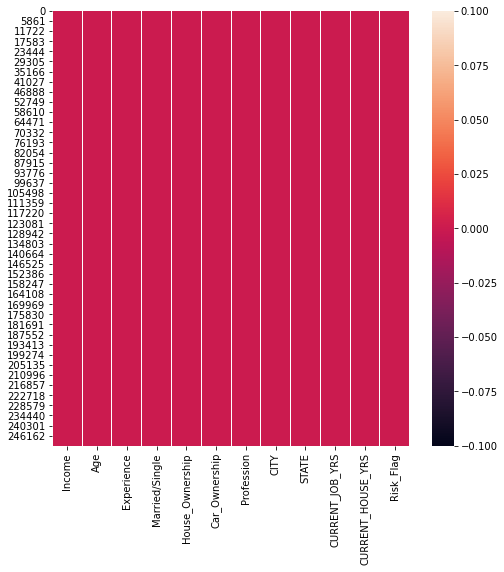

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())
plt.show()

There are no missing values in the given dataset

<a id='outlier'> </a>
### 4.3 Outlier Analysis

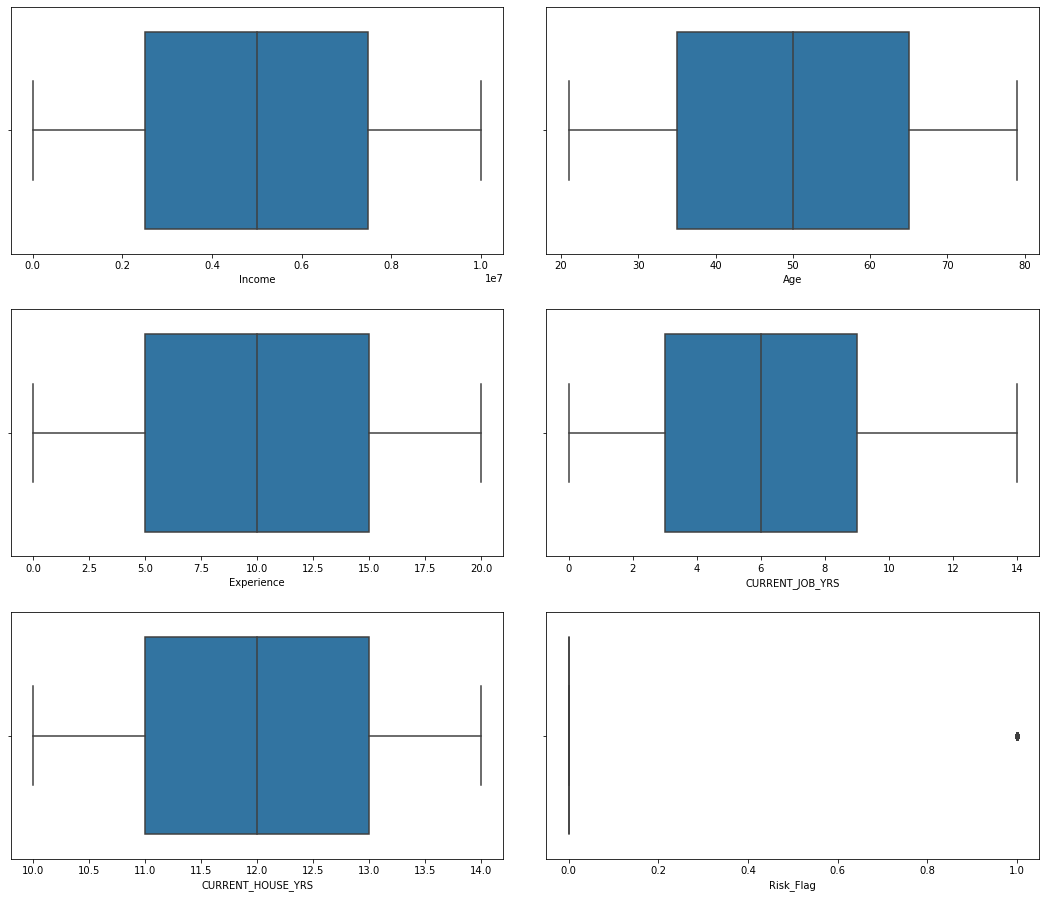

In [13]:
plt.figure(figsize=(15,25))
for index,i in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(6,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    sns.boxplot(df[i])

It can be observed that there are no outliers present in the dataset

<a id='newcol'> </a>
### 4.4 Creating New Columns for EDA

In [89]:
labels=[ 'Low_Income', 'Mid_Income', 'High_Income']
df['Income_Class']=pd.cut(df['Income'],3, labels=labels)

In [90]:
age_labels=[ '21 to 40', '41 to 60', '61 to 79']
df['Age_Group']=pd.cut(df['Age'],bins=[20,40,60,80], labels=age_labels)

In [95]:
exp_labels=[ '0-10 years','11-20 years']
df['Exp_level']=pd.cut(df['Experience'],bins=[0,10,20], labels=exp_labels)

In [156]:
North_Zone=['Himachal_Pradesh', 'Punjab','Chandigarh', 'Uttarakhand','Delhi' , 'Uttar_Pradesh' ,'Haryana','Jammu_and_Kashmir' ,'Uttar_Pradesh']
East_Zone=['Bihar', 'Odisha', 'Jharkhand', 'West_Bengal']
West_Zone=[ 'Rajasthan' , 'Gujarat', 'Goa' , 'Maharashtra']
South_Zone=['Andhra_Pradesh', 'Karnataka', 'Kerala' , 'Tamil_Nadu','Telangana','Puducherry']
Central_Zone=['Madhya_Pradesh' , 'Chhattisgarh']
Northeast_Zone=['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura' , 'Arunachal_Pradesh']


In [157]:
df['Zone']=df['STATE']
df['Zone']=df['Zone'].replace(North_Zone,'North')
df['Zone']=df['Zone'].replace(East_Zone,'East')
df['Zone']=df['Zone'].replace(West_Zone,'West')
df['Zone']=df['Zone'].replace(South_Zone,'South')
df['Zone']=df['Zone'].replace(Central_Zone,'Central')
df['Zone']=df['Zone'].replace(Northeast_Zone,'Northeast')

In [96]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Class,Age_Group,Exp_level,Zone
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,Low_Income,21 to 40,0-10 years,Central
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,High_Income,21 to 40,0-10 years,West
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,Mid_Income,61 to 79,0-10 years,South
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Mid_Income,41 to 60,0-10 years,East
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Mid_Income,41 to 60,11-20 years,South


<a id='eda'> </a>
## 5. Exploratory Data Analysis

<a id='univariate'> </a>
### 5.1. Univariate Analysis

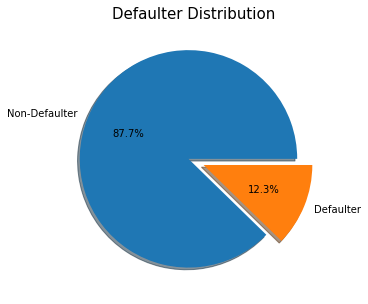

In [123]:
r = df.groupby('Risk_Flag')['Risk_Flag'].count()
plt.figure(figsize=(5,5))
plt.title('Defaulter Distribution',size=15)
plt.pie(r, explode=[0.05, 0.1], labels=['Non-Defaulter', 'Defaulter'], autopct='%1.1f%%',  shadow=True)
plt.show()

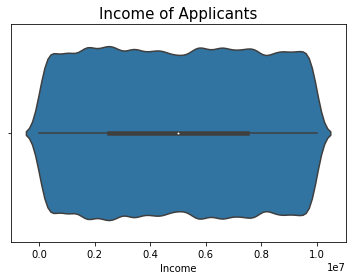

In [122]:
sns.violinplot(df['Income'])
plt.title('Income of Applicants',size=15)
plt.show()

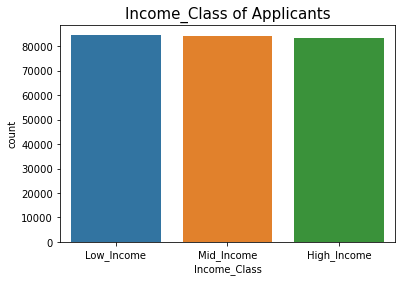

In [121]:
sns.countplot(df['Income_Class'])
plt.title('Income_Class of Applicants',size=15)
plt.show()

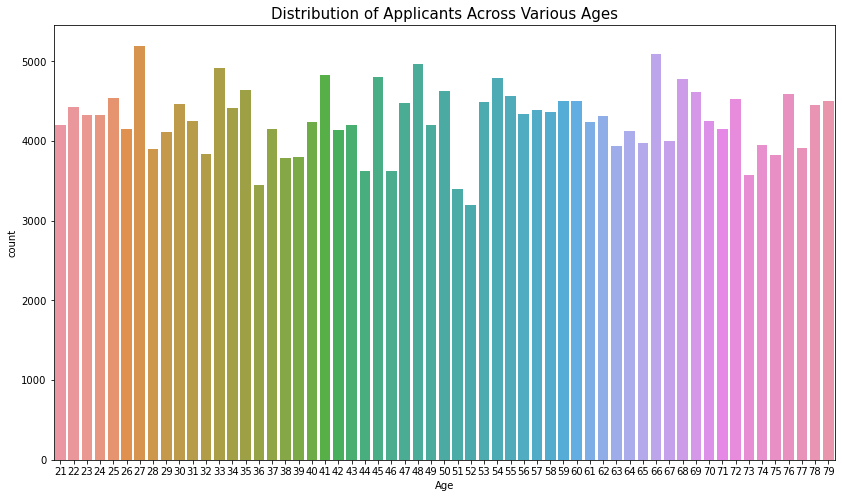

In [120]:
plt.figure(figsize=(14,8))
sns.countplot(df['Age'])
plt.title('Distribution of Applicants Across Various Ages',size=15)
plt.show()

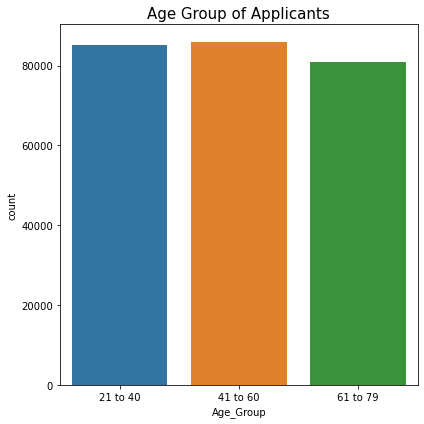

In [119]:
plt.figure(figsize=(6,6))
ax=sns.countplot(df['Age_Group'])
plt.title('Age Group of Applicants',size=15)
plt.tight_layout()
plt.show()

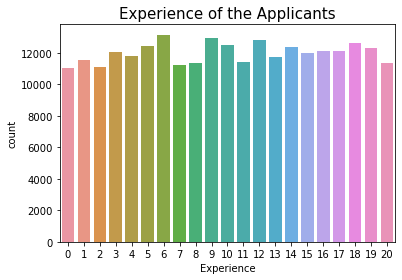

In [118]:
sns.countplot(df['Experience'])
plt.title('Experience of the Applicants',size=15)
plt.show()

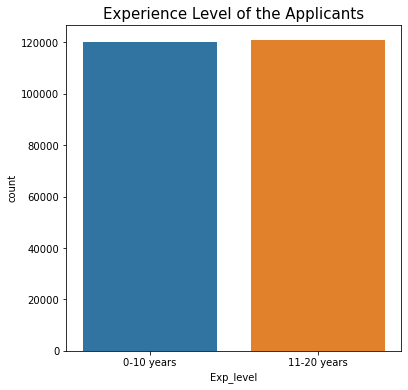

In [117]:
plt.figure(figsize=(6,6))
ax=sns.countplot(df['Exp_level'])
plt.title('Experience Level of the Applicants',size=15)
plt.show()

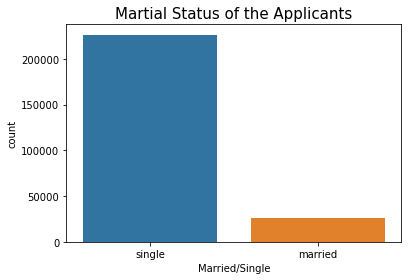

In [126]:
sns.countplot(df['Married/Single'])
plt.title('Martial Status of the Applicants',size=15)
plt.show()

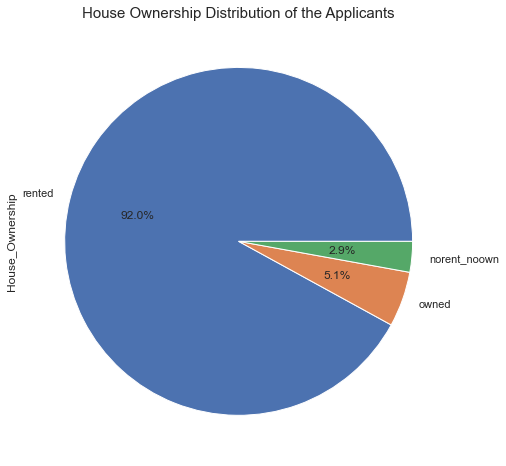

In [254]:
plt.figure(figsize=(10,8))
df['House_Ownership'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('House Ownership Distribution of the Applicants',size=15)
plt.show()

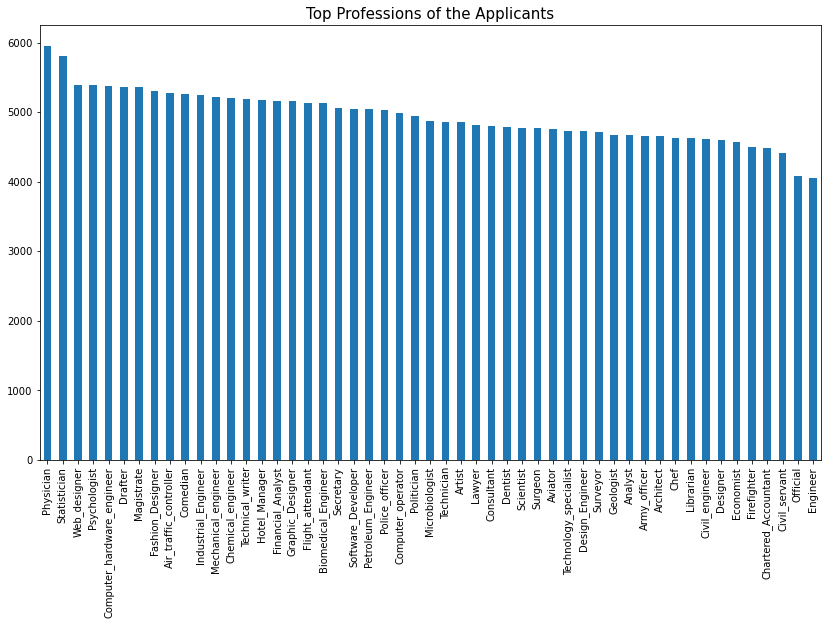

In [141]:
plt.figure(figsize=(14,8))
df['Profession'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Top Professions of the Applicants',size=15)
plt.show()

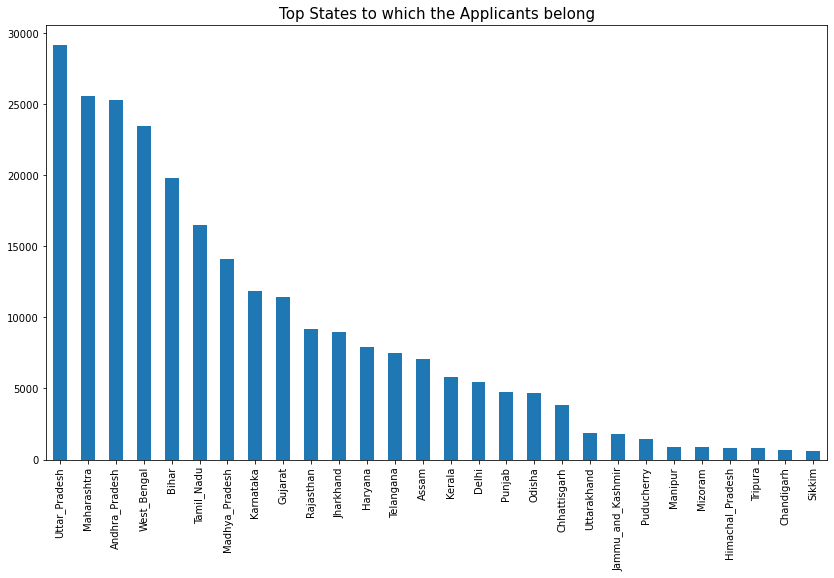

In [158]:
plt.figure(figsize=(14,8))
df['STATE'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Top States to which the Applicants belong',size=15)
plt.show()

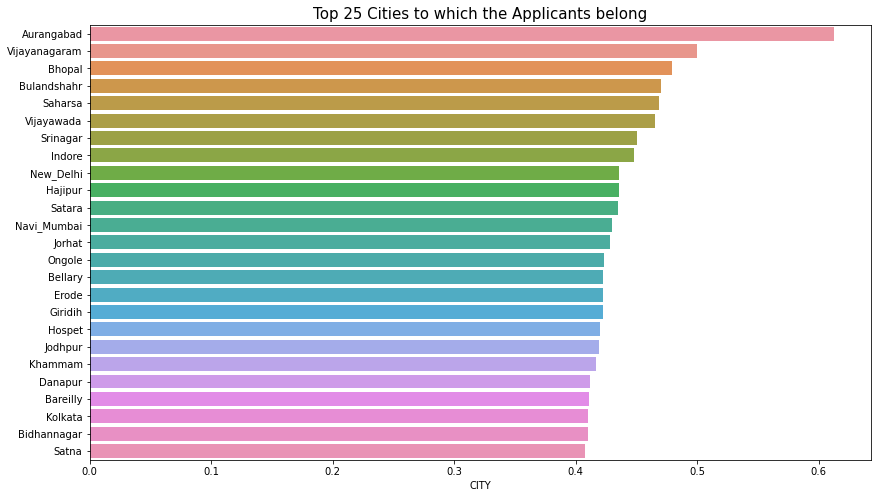

In [159]:
plt.figure(figsize=(14,8))
x = df.CITY.value_counts(1).sort_values(ascending=False)[:25] * 100
y = df.CITY.value_counts(1).sort_values(ascending=False)[:25].index
plt.title('Top 25 Cities to which the Applicants belong',size=15)

ax1 = sns.barplot(orient="h",x=x,y=y)

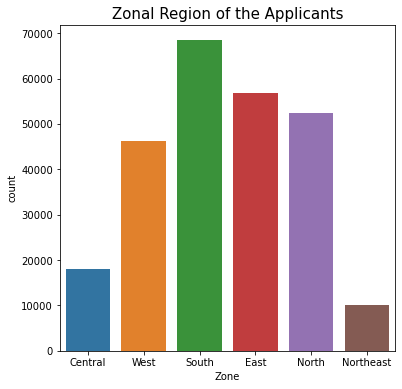

In [160]:
plt.figure(figsize=(6,6))
ax=sns.countplot(df['Zone'])
plt.title('Zonal Region of the Applicants',size=15)
plt.show()

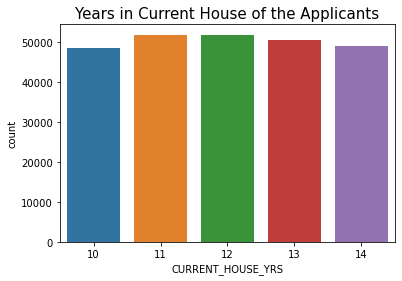

In [162]:
sns.countplot(df['CURRENT_HOUSE_YRS'])
plt.title('Years in Current House of the Applicants',size=15)
plt.show()

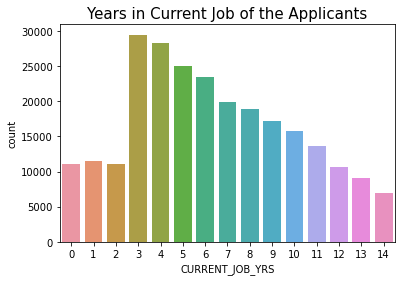

In [163]:
sns.countplot(df['CURRENT_JOB_YRS'])
plt.title('Years in Current Job of the Applicants',size=15)
plt.show()

<a id='bivariate'> </a>
### 5.2 Bivariate Analysis

<a id='num_target'> </a>
### 5.2.1 Numerical Variables Plotted against Risk_Flag

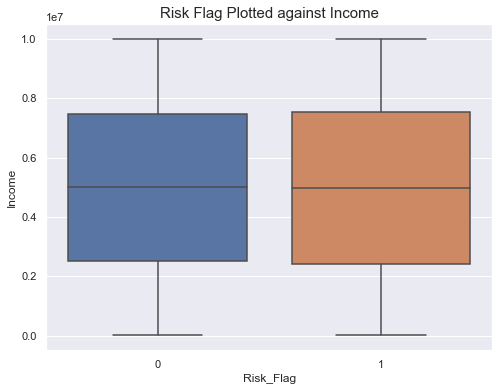

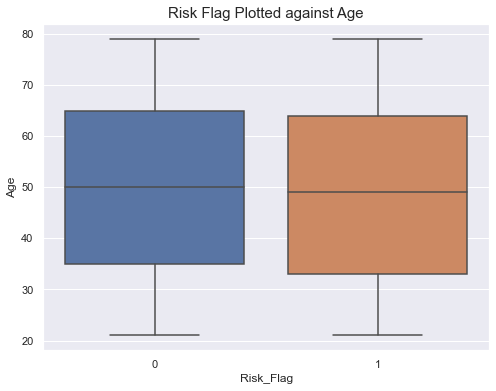

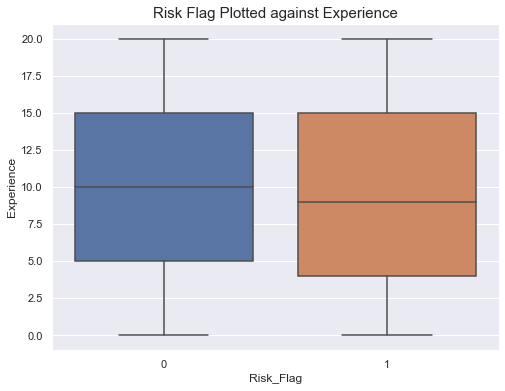

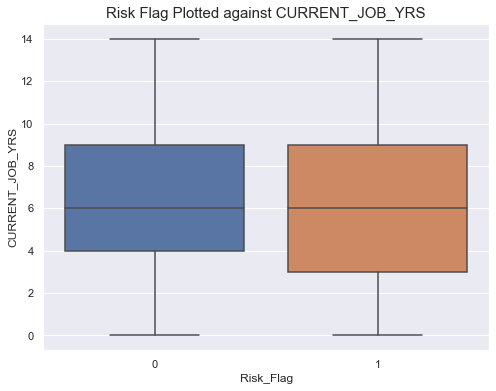

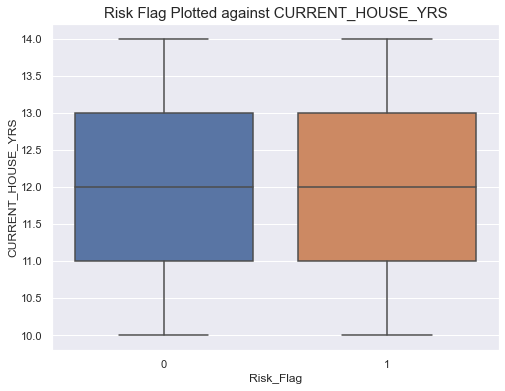

In [203]:
for col in ['Income', 'Age', 'Experience','CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS']:
    fig, ax = plt.subplots( figsize = (8,6) )
    plt.title(f'Risk Flag Plotted against {col}',size=15)
    sns.boxplot(x = "Risk_Flag", y = col, data = df)
    plt.show()

#### No significant inferences could be drawn from the analysis of numerical variables as the proportion of defaulters and non-defaulters is equally spread

<a id='cat_target'> </a>
### 5.2.2 Categorical Variables Plotted against Risk_Flag

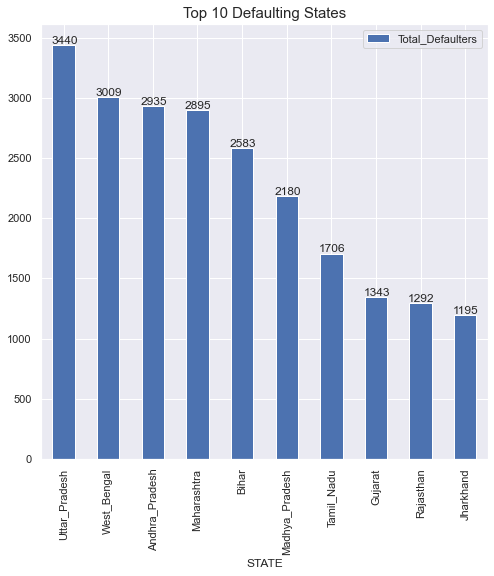

In [260]:
df_state = df.loc[df['Risk_Flag'] == 1].groupby(['STATE','Risk_Flag']).count()
df_state.rename(columns={'CITY':'Total_Defaulters'},inplace=True)
df_state.reset_index(inplace=True)
df_state[['STATE','Total_Defaulters']].sort_values(by='Total_Defaulters',ascending=False)[:10].plot(kind='bar',x='STATE',
                                                                                                    figsize=(8,8))
for index,value in enumerate(df_state['Total_Defaulters'].sort_values(ascending=False)[:10]):
    plt.text(index-0.28,value+10,str(value))
plt.title('Top 10 Defaulting States',size=15)

plt.show()

#### Uttar Pradesh has the highest number of defaulters followed by West Bengal and Andhra pradesh

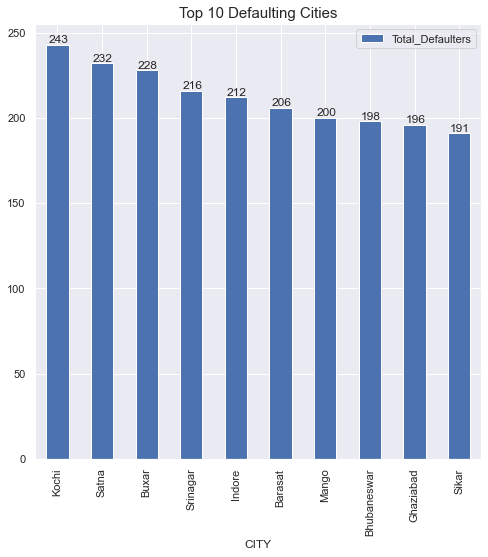

In [261]:
df_city = df.loc[df['Risk_Flag'] == 1].groupby(['CITY','Risk_Flag']).count()
df_city.rename(columns={'STATE':'Total_Defaulters'},inplace=True)
df_city.reset_index(inplace=True)
df_city[['CITY','Total_Defaulters']].sort_values(by='Total_Defaulters',ascending=False)[:10].plot(kind='bar',x='CITY',
                                                                                                    figsize=(8,8))
for index,value in enumerate(df_city['Total_Defaulters'].sort_values(ascending=False)[:10]):
    plt.text(index-0.2,value+1,str(value))
plt.title('Top 10 Defaulting Cities',size=15)
plt.show()

#### Kochi has the highest number of defaulters followed by Satna and Buxar

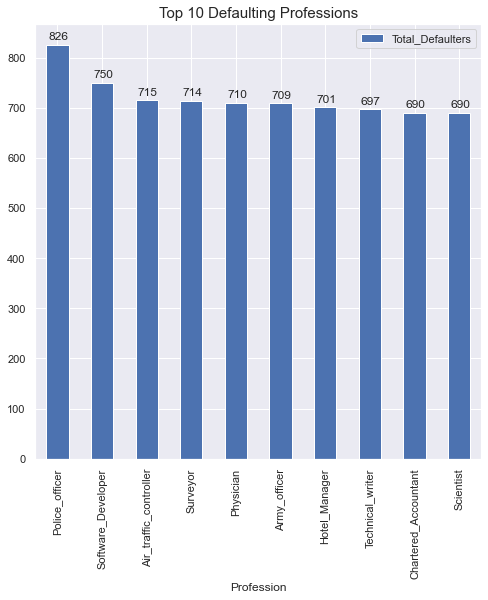

In [262]:
df_profession = df.loc[df['Risk_Flag'] == 1].groupby(['Profession','Risk_Flag']).count()
df_profession.rename(columns={'STATE':'Total_Defaulters'},inplace=True)
df_profession.reset_index(inplace=True)
df_profession[['Profession','Total_Defaulters']].sort_values(by='Total_Defaulters',ascending=False)[:10].plot(kind='bar',x='Profession',
                                                                                                    figsize=(8,8))
for index,value in enumerate(df_profession['Total_Defaulters'].sort_values(ascending=False)[:10]):
    plt.text(index-0.2,value+10,str(value))
plt.title('Top 10 Defaulting Professions',size=15)
plt.show()

#### Police officers have the highest defaulters as per our dataset

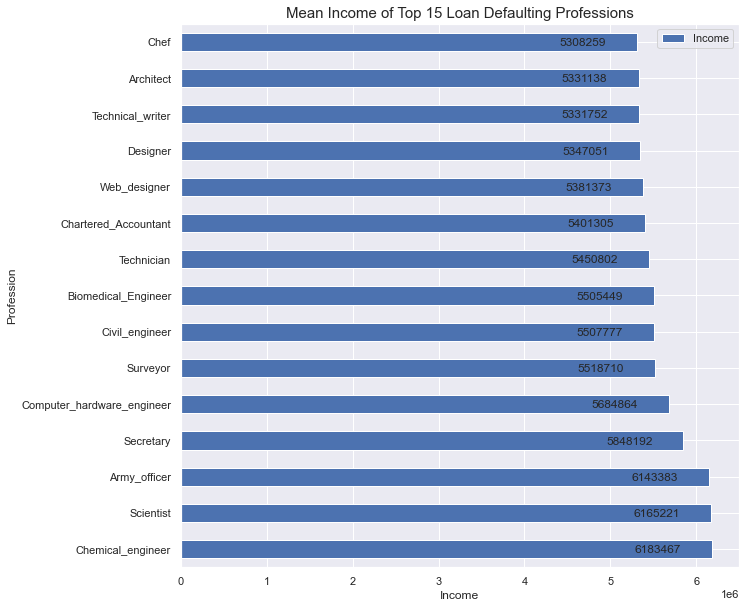

In [273]:
df_mean_income = df.loc[df['Risk_Flag'] == 1].groupby(['Profession']).mean()[['Income']].sort_values(by='Income',ascending=False)
df_mean_income.sort_values(by='Income',ascending=False)[:15].plot(kind='barh',figsize=(10,10))
plt.title('Mean Income of Top 15 Loan Defaulting Professions',size=15) 
plt.xlabel('Income')
plt.ylabel('Profession')
for index,value in enumerate(df_mean_income['Income'][:15]):
    plt.text(value-900000,index-0.1,str(int(value)))

plt.legend(loc='best')
plt.show()

In [264]:
def plot_cat_features(feature_name, limit=10, ascending=False):

    # creates a df of categorical as index and risk_flag as columns, the values are the total counts.
    group_risk = df.groupby([feature_name,"Risk_Flag"])[feature_name].count().unstack()
    
    # loops through each row and updates the values as a percentage
    for row in group_risk.index:
        group_risk.loc[row] = group_risk.loc[row]/group_risk.loc[row].sum()
    
    # orders the values by highest percentage loan defaults first
    group_risk = group_risk.sort_values(by=1, ascending=ascending)[:limit]
    
    # plots the data as a bar plot
    group_risk.plot(kind="bar", figsize=(2*len(group_risk.index), 6))
    plt.title(f"{feature_name} vs Risk_Flag Count",size=15)
    plt.ylabel("Percentage");

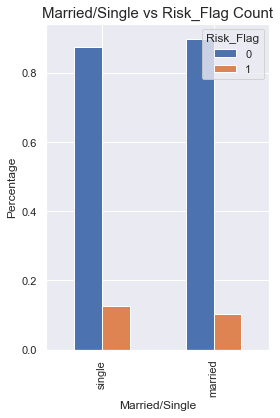

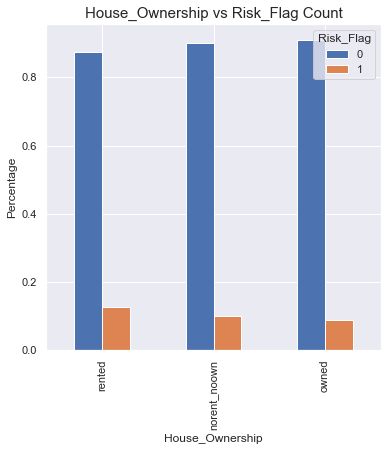

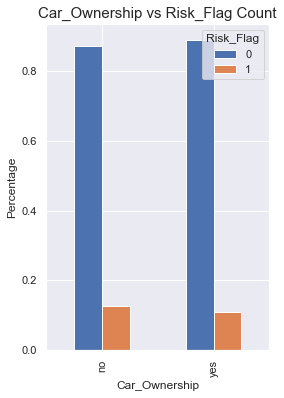

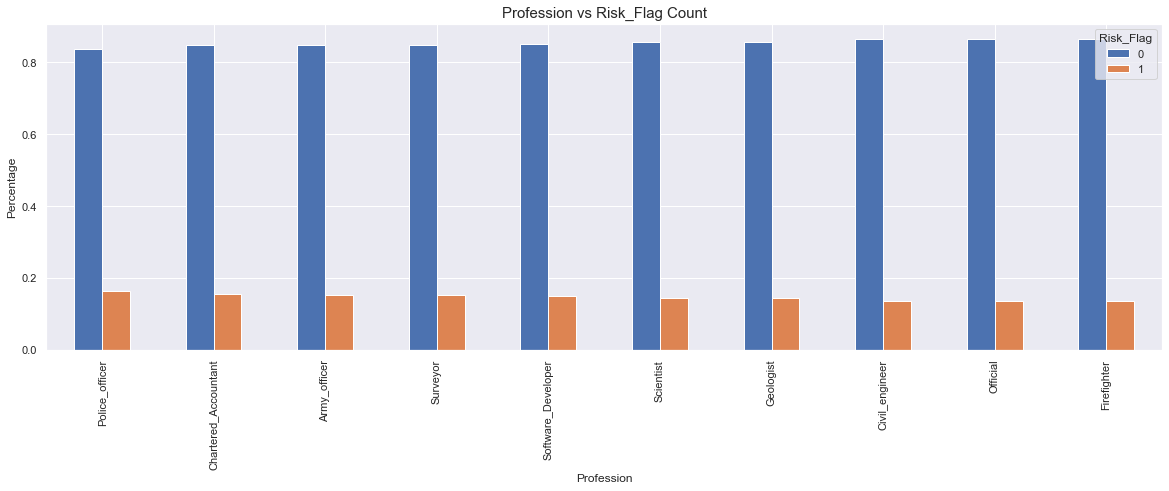

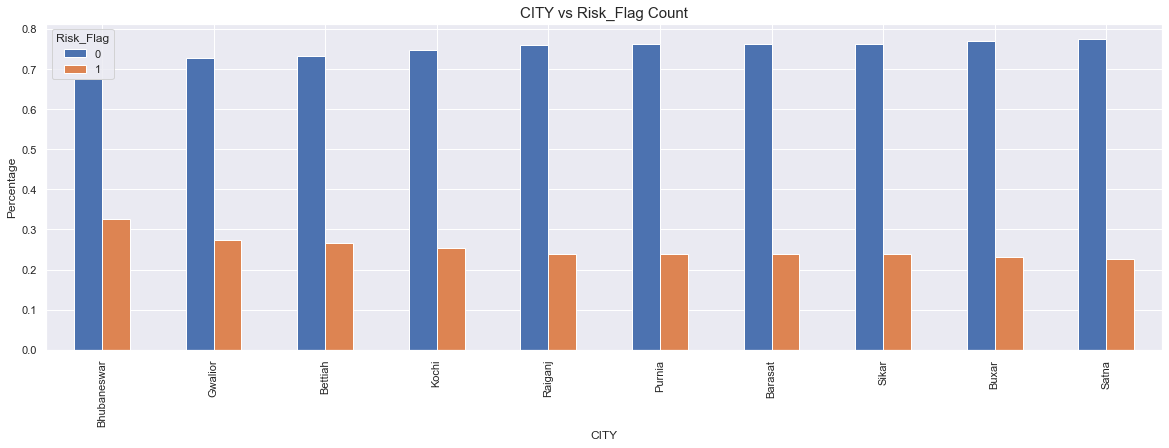

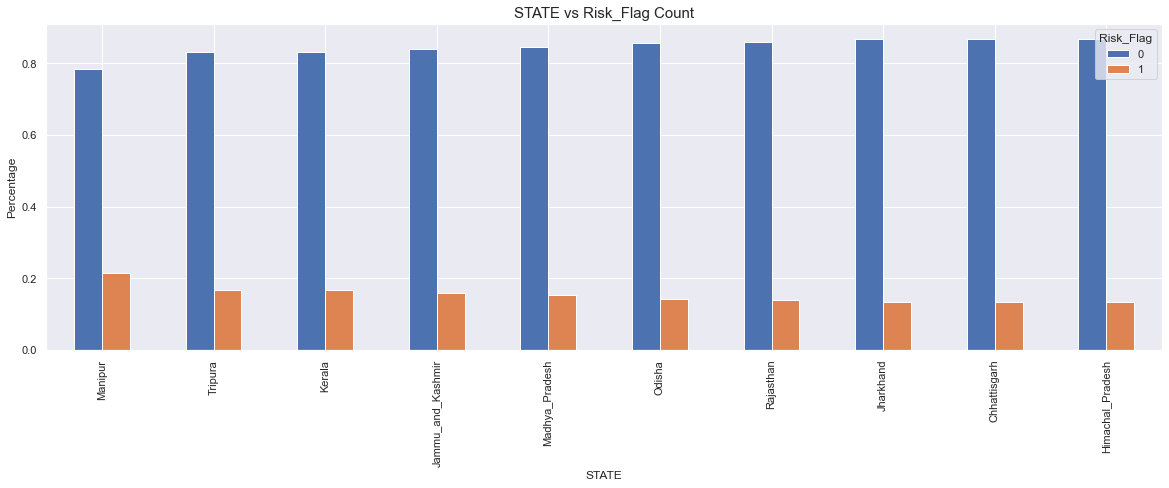

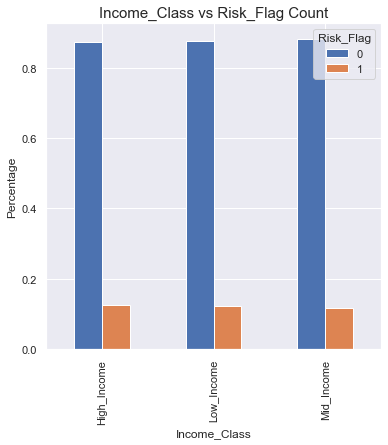

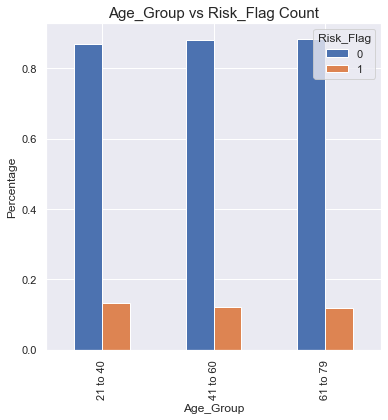

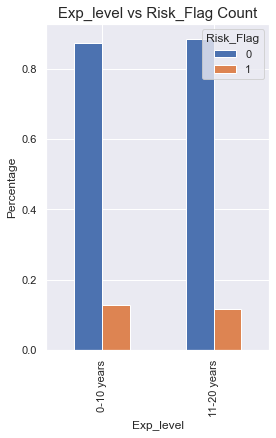

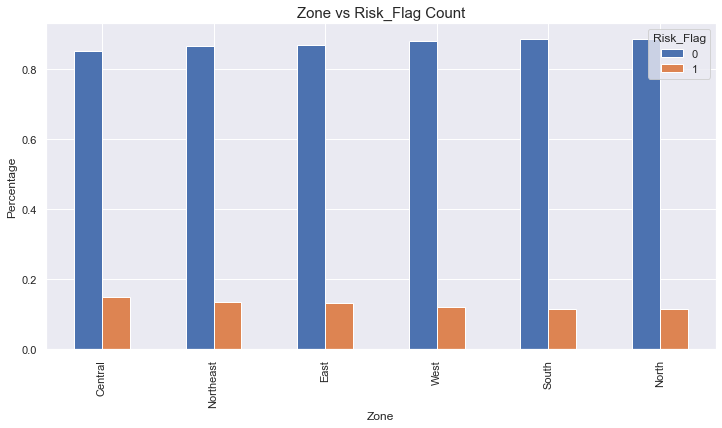

In [274]:
cat_col=df.select_dtypes(exclude=np.number)
for col in cat_col:
    plot_cat_features(col)

### 3.2.3 Inferences

In [268]:
df[(df["Married/Single"] == "single")
          & (df["House_Ownership"] == "rented")
          & (df["Car_Ownership"] == "no")
          & (df["Profession"] == "Police_officer")
          & (df["STATE"] == "Manipur")]["Risk_Flag"].value_counts(normalize=True)

0   0.50
1   0.50
Name: Risk_Flag, dtype: float64

#### As per the inferences drawn from above, the worst possible combination of an application has to be of a police officer from Manipur who is single, does not own a car and lives in a rented house. There is a 50% chance that he will default the loan

<a id='heatmap'> </a>
### 5.3 Heatmap to check the correlation between the variables

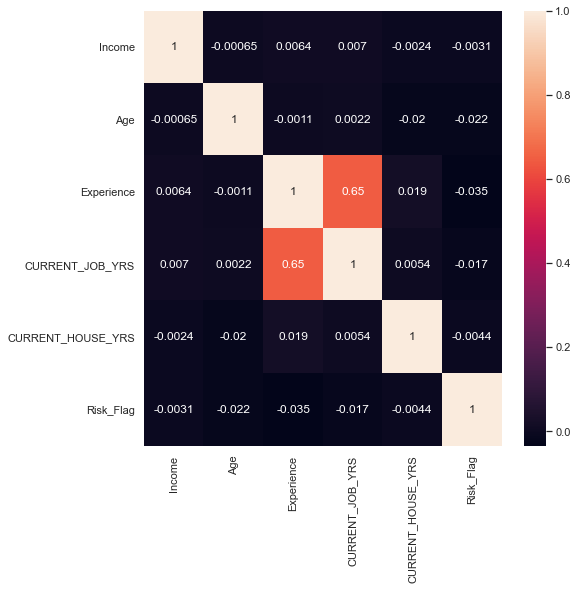

In [259]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Experience and CURRENT_JOB_YRS show correlation

<a id='stats'> </a>
## 6. Statistical Significance of variables

In [275]:
def chi_square_test(data):
    stat, p, dof, expected = chi2_contingency(data)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

In [276]:
car_ownership_risk_flag = pd.crosstab(df["Car_Ownership"], df["Risk_Flag"])
car_ownership_risk_flag

Risk_Flag,0,1
Car_Ownership,,
no,153439,22561
yes,67565,8435


In [277]:
chi_square_test(car_ownership_risk_flag)

p value is 1.7350853850183746e-33
Dependent (reject H0)


In [278]:
marital_status_risk_flag = pd.crosstab(df["Married/Single"], df["Risk_Flag"])
marital_status_risk_flag

Risk_Flag,0,1
Married/Single,,
married,23092,2636
single,197912,28360


In [279]:
chi_square_test(marital_status_risk_flag)

p value is 3.773053705715196e-26
Dependent (reject H0)


In [280]:
house_ownership_risk_flag = pd.crosstab(df["House_Ownership"], df["Risk_Flag"])
house_ownership_risk_flag

Risk_Flag,0,1
House_Ownership,,
norent_noown,6469,715
owned,11758,1160
rented,202777,29121


In [281]:
chi_square_test(house_ownership_risk_flag)

p value is 1.8381930028370595e-40
Dependent (reject H0)


<a id='feature'> </a>
## 7. Feature Engineering

<a id='encode'> </a>
### 7.1 Encoding the Categorical Variables

1. Will be one hot encoding Married/Single, House_Ownership and Car_Ownership
2. Will be frequency encoding State and Profession as they have high cardinality

In [282]:
ohe_columns=['Married/Single', 'House_Ownership', 'Car_Ownership']
df= pd.get_dummies(df, columns = ohe_columns,drop_first=True)

In [283]:
fq_profession=(df.groupby('Profession').size()/len(df))
fq_state=(df.groupby('STATE').size()/len(df))

df.loc[:, "{}_freq_encode".format('Profession')] = df['Profession'].map(fq_profession)  

df.loc[:, "{}_freq_encode".format('STATE')] = df['STATE'].map(fq_state)  

In [284]:
df.head()

,Income,Age,Experience,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Class,Age_Group,Exp_level,Zone,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_freq_encode,STATE_freq_encode
0,1303834,23,3,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,Low_Income,21 to 40,0-10 years,Central,1,0,1,0,0.02,0.06
1,7574516,40,10,Software_Developer,Parbhani,Maharashtra,9,13,0,High_Income,21 to 40,0-10 years,West,1,0,1,0,0.02,0.10
2,3991815,66,4,Technical_writer,Alappuzha,Kerala,4,10,0,Mid_Income,61 to 79,0-10 years,South,0,0,1,0,0.02,0.02
3,6256451,41,2,Software_Developer,Bhubaneswar,Odisha,2,12,1,Mid_Income,41 to 60,0-10 years,East,1,0,1,1,0.02,0.02
4,5768871,47,11,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1,Mid_Income,41 to 60,11-20 years,South,1,0,1,0,0.02,0.07


<a id='scale'> </a>
### 7.2 Scaling the Numerical Columns

In [285]:
df['Income']=((df['Income']-df['Income'].mean())/df['Income'].std())
df['Age']=((df['Age']-df['Age'].mean())/df['Age'].std())
df['Experience']=((df['Experience']-df['Experience'].mean())/df['Experience'].std())
df['CURRENT_HOUSE_YRS']=((df['CURRENT_HOUSE_YRS']-df['CURRENT_HOUSE_YRS'].mean())/df['CURRENT_HOUSE_YRS'].std())

<a id='drop2'> </a>
### 7.3 Dropping unnecessary columns

In [286]:
df.columns

Index(['Income', 'Age', 'Experience', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Income_Class',
       'Age_Group', 'Exp_level', 'Zone', 'Married/Single_single',
       'House_Ownership_owned', 'House_Ownership_rented', 'Car_Ownership_yes',
       'Profession_freq_encode', 'STATE_freq_encode'],
      dtype='object')

In [287]:
df.drop(['Profession', 'CITY','CURRENT_JOB_YRS','Income_Class',
       'Age_Group', 'Exp_level','Zone'],axis=1,inplace=True)

In [289]:
df.drop(['STATE'],axis=1,inplace=True)

In [290]:
df.head()

,Income,Age,Experience,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_freq_encode,STATE_freq_encode
0,-1.28,-1.58,-1.18,0.72,0,1,0,1,0,0.02,0.06
1,0.90,-0.58,-0.01,0.72,0,1,0,1,0,0.02,0.10
2,-0.35,0.94,-1.01,-1.43,0,0,0,1,0,0.02,0.02
3,0.44,-0.52,-1.35,0.00,1,1,0,1,1,0.02,0.02
4,0.27,-0.17,0.15,1.43,1,1,0,1,0,0.02,0.07


<a id='smote'> </a>
### 7.4 Splitting the Dataset and Using SMOTE to Handle the Target Imbalance

In [291]:
X  = df.drop('Risk_Flag', axis = 1)
y = df['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [292]:
sm = SMOTE(random_state = 500)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train.value_counts()

0    176740
1    176740
Name: Risk_Flag, dtype: int64

<a id='metrics'> </a>
## 8. Defining Metrics to Evaluate the Classification Models

In our context,

    output = 1 means client will have payment difficulties
    output = 0 means client will repay in time
Following metrics will be determined for each of our classification models:

Accuracy

    Accuracy, as name suggests, measures the accuracy of the model in predictions
    Error = (1 - Accuracy)
    This metric assumes equal costs for both kinds of errors i.e. false postives and false negatives
    Accuracy may not be good metric if cost of misclassification/error is high
    Formula: (TP + TN) / (TP + FP + FN + TN)

Recall

    This metric measures sensitivity of the model
    Recall shows how many of "actually positives" are predicted as "true positives" by the model
    Recall is a good metric when the cost of 'False Negative' is high. In our context, 'False Negative' means approving loan 
    to a client when there is chance of defaulting.
    Formula: (True Positives) / (Actually Positives) = TP / (TP + FN)

Precision

    Precision shows how precise the model is in predicting postives.
    Precision is a good metric when the cost of 'False Positive' is high. In our context, 'False Positive' means loosing a 
    good client.
    Formula: (True Positives) / (Predicted Positives) = TP / (TP + FP)
    
F1 score

    This is harmonic mean of precision and recall
    F1 score ranges from 0 (means, worst) to 1 (means, perfect precision and recall)
    This is a good metric when we want to give equal importance to both precision and recall
    Formula: 2 (Precision Recall) / (Precision + Recall)

Receiver Operating Characteristic curve and Area Under Curve (ROC curve and AUC)

    ROC curve is used to assess the performance of the classifier over its entire operating range
    For a perfect classifier the ROC curve will go straight up the Y axis and then along the X axis
    Diagonal curve indicates worst power of the classifier
    Area Under Curve (AUC) is the most common metric related to ROC curve
    AUC for most classifiers usually ranges between 0.5 (that means, classifier is probably randomly guessing) to 1 
    (that means, perfect classifier)
    AUC < 0.5 means something is wrong with the model or the data or both

#### For our model selection, we shall use each model's ROC AUC value.

#### ROC AUC

Area under ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes.

TPR or true positive rate is a measure for 'recall' or sensitivity. FPR or false positive rate is a measure for expectancy of the false positives from the model.

TPR = TP / (TP + FN)

FPR = 1 - specificity = 1 - TN / (TN + FP) = FP / (TN + FP)

AUC ranges in value from 0 to 1. Higher the AUC, better the model is at predicting who will repay the loan in time and who will have difficulties in repaying the loan.

AUC as a metric is appropriate for following reasons:

    AUC provides an aggregate measure of performance across all possible classification thresholds.
    AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
    AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what 
    classification threshold is chosen.

<a id='models'> </a>
## 9. Machine Learning Models

In [299]:
def get_report(model):
    
    y_pred = model.predict(X_test)
    
    return (classification_report(y_test , y_pred))

In [385]:
# Defining a function to print the confusion matrix
def confmatrix(model):
    matrix = confusion_matrix(y_test, model.predict(X_test))
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         matrix.flatten()/np.sum(matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title('Confusion Matrix',size=15);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [383]:
def get_roc_curve(model):
    ypred_model = model.predict(X_test)
    auc_model = roc_auc_score(y_test, ypred_model)

    y_pred_prob_model_test = model.predict_proba(X_test)
    y_pred_prob_model_train = model.predict_proba(X_train)
    fpr,tpr,th = roc_curve(y_test,y_pred_prob_model_test[:,1])
    plt.figure(figsize=(6,4))
    plt.plot([0,1],[0,1],'r--')
    plt.title('ROC curve',size=15)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.plot(fpr, tpr)
    plt.text(x  = 0.8 , y = 0.3 , s = round((auc_model),4))
    
    plt.grid(True)
    plt.show()

In [464]:
# creating a list to compare the models
report_list=[]

<a id='logreg'> </a>

### 9.1 Logistic Regression Base Model

In [363]:
lr=LogisticRegression()
lr_base=lr.fit(X_train,y_train)

In [296]:
score_lr_base=cross_val_score(lr_base, X_train ,y_train , scoring='roc_auc')
bias_lr_base=np.mean(1-score_lr_base)
var_lr_base=np.std(score_lr_base)
ypred_lr_base = lr_base.predict(X_test)
accuracy_lr_base = accuracy_score(y_test, ypred_lr_base)
f1_lr_base = f1_score(y_test, ypred_lr_base)
precision_lr_base = precision_score(y_test, ypred_lr_base)
recall_lr_base = recall_score(y_test, ypred_lr_base)
auc_lr_base = roc_auc_score(y_test, ypred_lr_base)
conf_lr_base = confusion_matrix(y_test, ypred_lr_base)
cr_lr_base=classification_report(y_test,ypred_lr_base,output_dict=True)

In [465]:
report_list.append(['Logistic Regression Base',cr_lr_base['0']['precision'],cr_lr_base['0']['recall'],cr_lr_base['0']['f1-score'],cr_lr_base['1']['precision'],cr_lr_base['1']['recall'],cr_lr_base['1']['f1-score'],cr_lr_base['accuracy'],score_lr_base.mean(),auc_lr_base,bias_lr_base,var_lr_base])

              precision    recall  f1-score   support

           0       0.89      0.50      0.64     44264
           1       0.14      0.57      0.22      6136

    accuracy                           0.51     50400
   macro avg       0.52      0.54      0.43     50400
weighted avg       0.80      0.51      0.59     50400


Auc: 0.536436457113665
Recall: 0.5736636245110821
Precision: 0.1370342975045743
f1_score: 0.22122364327687521
Accuracy: 0.5082738095238095
Bias error: 0.4467418954260552
Variance error: 0.0023431242057974752


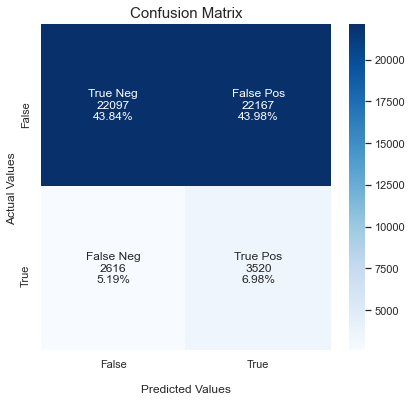

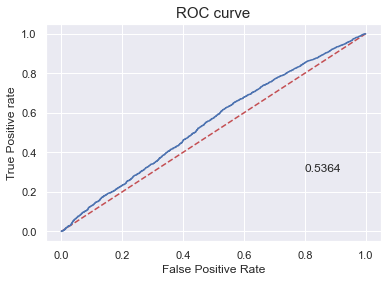

In [386]:
print(get_report(lr_base))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_lr_base)
print('Recall:',recall_lr_base)
print('Precision:',precision_lr_base)
print('f1_score:',f1_lr_base)
print('Accuracy:',accuracy_lr_base)
print('Bias error:',bias_lr_base)
print('Variance error:',var_lr_base)
confmatrix(lr_base)
print
get_roc_curve(lr_base)

<a id='knn
       '> </a>

### 9.2 KNN Base Model

In [368]:
knn = KNeighborsClassifier()
knn_base=knn.fit(X_train,y_train)

In [332]:
score_knn_base=cross_val_score(knn_base, X_train ,y_train , scoring='roc_auc')
bias_knn_base=np.mean(1-score_knn_base)
var_knn_base=np.std(score_knn_base)
ypred_knn_base = knn_base.predict(X_test)
accuracy_knn_base = accuracy_score(y_test, ypred_knn_base)
f1_knn_base= f1_score(y_test, ypred_knn_base)
precision_knn_base = precision_score(y_test, ypred_knn_base)
recall_knn_base = recall_score(y_test, ypred_knn_base)
auc_knn_base = roc_auc_score(y_test, ypred_knn_base)
conf_knn_base= confusion_matrix(y_test, ypred_knn_base)
cr_knn_base=classification_report(y_test,ypred_knn_base,output_dict=True)

In [466]:
report_list.append(['KNN Base',cr_knn_base['0']['precision'],cr_knn_base['0']['recall'],cr_knn_base['0']['f1-score'],cr_knn_base['1']['precision'],cr_knn_base['1']['recall'],cr_knn_base['1']['f1-score'],cr_knn_base['accuracy'],score_knn_base.mean(),auc_knn_base,bias_knn_base,var_knn_base])

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     44264
           1       0.46      0.85      0.60      6136

    accuracy                           0.86     50400
   macro avg       0.72      0.85      0.76     50400
weighted avg       0.91      0.86      0.88     50400


Auc: 0.8540342041622495
Recall: 0.8459908735332464
Precision: 0.45954320113314445
f1_score: 0.5955713630105552
Accuracy: 0.8601190476190477
Bias error: 0.05920307875260191
Variance error: 0.0011559845217790545


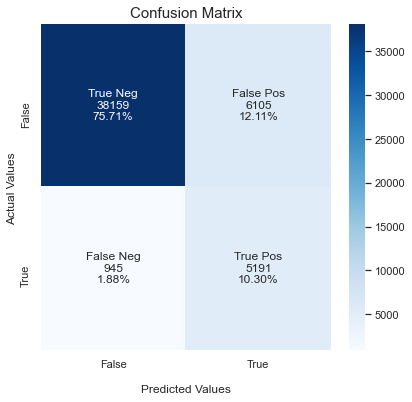

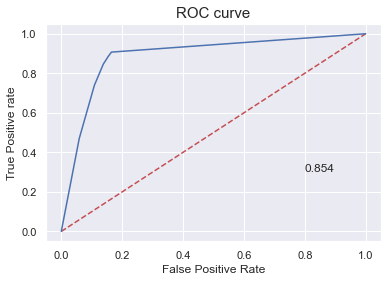

In [387]:
print(get_report(knn_base))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_knn_base)
print('Recall:',recall_knn_base)
print('Precision:',precision_knn_base)
print('f1_score:',f1_knn_base)
print('Accuracy:',accuracy_knn_base)
print('Bias error:',bias_knn_base)
print('Variance error:',var_knn_base)
confmatrix(knn_base)
get_roc_curve(knn_base)

<a id='dt'> </a>

### 9.3 Decision Tree Base Model

In [388]:
dt=DecisionTreeClassifier()
dt_base = dt.fit(X_train,y_train)

In [389]:
score_dt_base=cross_val_score(dt_base, X_train ,y_train , scoring='roc_auc')
bias_dt_base=np.mean(1-score_dt_base)
var_dt_base=np.std(score_dt_base)
ypred_dt_base = dt_base.predict(X_test)
accuracy_dt_base = accuracy_score(y_test, ypred_dt_base)
f1_dt_base= f1_score(y_test, ypred_dt_base)
precision_dt_base = precision_score(y_test, ypred_dt_base)
recall_dt_base = recall_score(y_test, ypred_dt_base)
auc_dt_base = roc_auc_score(y_test, ypred_dt_base)
conf_dt_base= confusion_matrix(y_test, ypred_dt_base)
cr_dt_base=classification_report(y_test,ypred_dt_base,output_dict=True)

In [467]:
report_list.append(['Decision Tree Base',cr_dt_base['0']['precision'],cr_dt_base['0']['recall'],cr_dt_base['0']['f1-score'],cr_dt_base['1']['precision'],cr_dt_base['1']['recall'],cr_dt_base['1']['f1-score'],cr_dt_base['accuracy'],score_dt_base.mean(),auc_dt_base,bias_dt_base,var_dt_base])

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     44264
           1       0.48      0.83      0.61      6136

    accuracy                           0.87     50400
   macro avg       0.73      0.85      0.77     50400
weighted avg       0.91      0.87      0.89     50400


Auc: 0.854567186191845
Recall: 0.8316492829204694
Precision: 0.4847995439863196
f1_score: 0.6125315088224703
Accuracy: 0.871904761904762
Bias error: 0.07938025303662377
Variance error: 0.01501069307125811


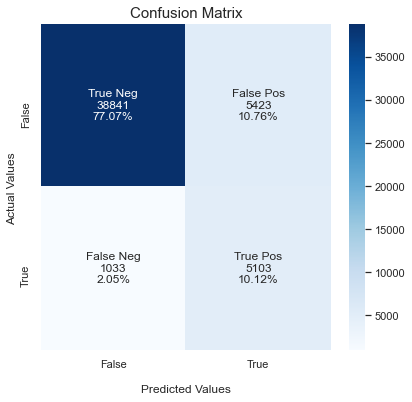

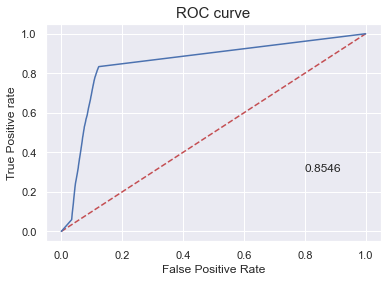

In [391]:
print(get_report(dt_base))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_dt_base)
print('Recall:',recall_dt_base)
print('Precision:',precision_dt_base)
print('f1_score:',f1_dt_base)
print('Accuracy:',accuracy_dt_base)
print('Bias error:',bias_dt_base)
print('Variance error:',var_dt_base)
confmatrix(dt_base)
get_roc_curve(dt_base)

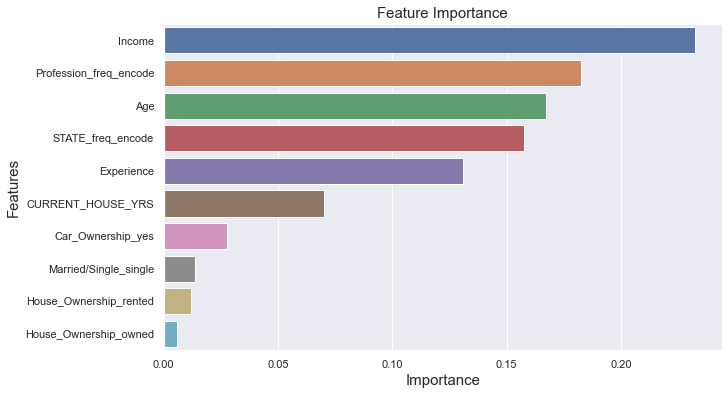

In [395]:
# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': dt_base.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)
plt.figure(figsize=(10,6))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)



# display the plot
plt.show()

<a id='rf'> </a>

### 9.4 Random Forest Base Model

In [396]:
rf=RandomForestClassifier()
rf_base=rf.fit(X_train,y_train)

In [397]:
score_rf_base=cross_val_score(rf_base, X_train ,y_train , scoring='roc_auc')
bias_rf_base=np.mean(1-score_rf_base)
var_rf_base=np.std(score_rf_base)
ypred_rf_base = rf_base.predict(X_test)
accuracy_rf_base = accuracy_score(y_test, ypred_rf_base)
f1_rf_base= f1_score(y_test, ypred_rf_base)
precision_rf_base = precision_score(y_test, ypred_rf_base)
recall_rf_base = recall_score(y_test, ypred_rf_base)
auc_rf_base = roc_auc_score(y_test, ypred_rf_base)
conf_rf_base= confusion_matrix(y_test, ypred_rf_base)
cr_rf_base=classification_report(y_test,ypred_rf_base,output_dict=True)

In [468]:
report_list.append(['Random Forest Base',cr_rf_base['0']['precision'],cr_rf_base['0']['recall'],cr_rf_base['0']['f1-score'],cr_rf_base['1']['precision'],cr_rf_base['1']['recall'],cr_rf_base['1']['f1-score'],cr_rf_base['accuracy'],score_rf_base.mean(),auc_rf_base,bias_rf_base,var_rf_base])

              precision    recall  f1-score   support

           0       0.97      0.90      0.94     44264
           1       0.53      0.79      0.64      6136

    accuracy                           0.89     50400
   macro avg       0.75      0.85      0.79     50400
weighted avg       0.92      0.89      0.90     50400


Auc: 0.8469954540859619
Recall: 0.7902542372881356
Precision: 0.5322722283205269
f1_score: 0.6361012724649088
Accuracy: 0.8899206349206349
Bias error: 0.03787861989147776
Variance error: 0.004544035720721093


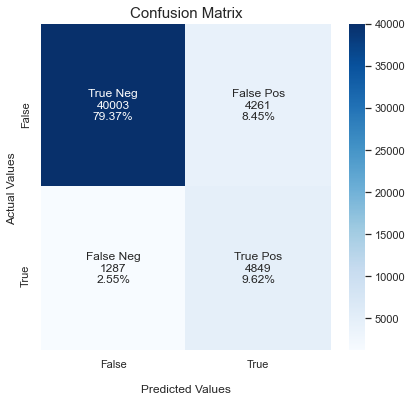

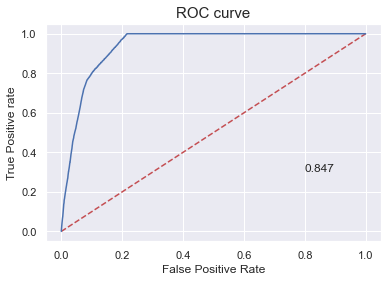

In [399]:
print(get_report(rf_base))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_rf_base)
print('Recall:',recall_rf_base)
print('Precision:',precision_rf_base)
print('f1_score:',f1_rf_base)
print('Accuracy:',accuracy_rf_base)
print('Bias error:',bias_rf_base)
print('Variance error:',var_rf_base)
confmatrix(rf_base)
get_roc_curve(rf_base)

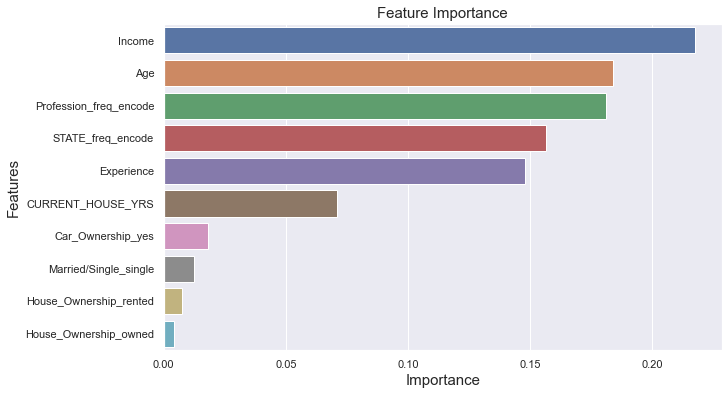

In [400]:
# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_base.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)
plt.figure(figsize=(10,6))

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

<a id='gaussiannb'> </a>

### 9.5 GaussianNB Base Model

In [401]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_base=nb.fit(X_train,y_train)

In [402]:
score_nb_base=cross_val_score(nb_base, X_train ,y_train , scoring='roc_auc')
bias_nb_base=np.mean(1-score_nb_base)
var_nb_base=np.std(score_nb_base)
ypred_nb_base = nb_base.predict(X_test)
accuracy_nb_base = accuracy_score(y_test, ypred_nb_base)
f1_nb_base= f1_score(y_test, ypred_nb_base)
precision_nb_base = precision_score(y_test, ypred_nb_base)
recall_nb_base = recall_score(y_test, ypred_nb_base)
auc_nb_base = roc_auc_score(y_test, ypred_nb_base)
conf_nb_base= confusion_matrix(y_test, ypred_nb_base)
cr_nb_base=classification_report(y_test,ypred_nb_base,output_dict=True)

In [469]:
report_list.append(['Gaussian NB Base',cr_nb_base['0']['precision'],cr_nb_base['0']['recall'],cr_nb_base['0']['f1-score'],cr_nb_base['1']['precision'],cr_nb_base['1']['recall'],cr_nb_base['1']['f1-score'],cr_nb_base['accuracy'],score_nb_base.mean(),auc_nb_base,bias_nb_base,var_nb_base])

              precision    recall  f1-score   support

           0       0.90      0.19      0.31     44264
           1       0.13      0.85      0.22      6136

    accuracy                           0.27     50400
   macro avg       0.51      0.52      0.26     50400
weighted avg       0.80      0.27      0.30     50400


Auc: 0.5176239882030562
Recall: 0.8492503259452412
Precision: 0.12635177731438824
f1_score: 0.2199755160623074
Accuracy: 0.26674603174603173
Bias error: 0.4434175488739524
Variance error: 0.003803689137396285


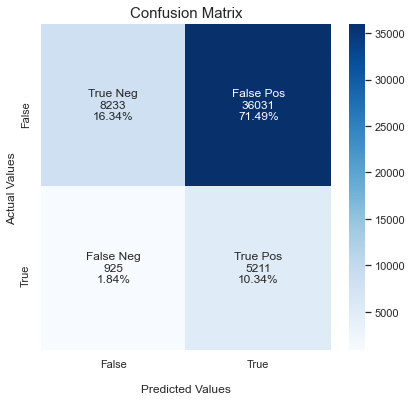

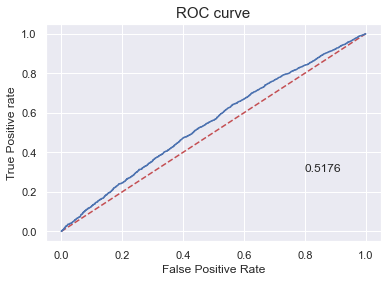

In [404]:
print(get_report(nb_base))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_nb_base)
print('Recall:',recall_nb_base)
print('Precision:',precision_nb_base)
print('f1_score:',f1_nb_base)
print('Accuracy:',accuracy_nb_base)
print('Bias error:',bias_nb_base)
print('Variance error:',var_nb_base)
confmatrix(nb_base)
get_roc_curve(nb_base)

<a id='lgbm'> </a>

### 9.6 LGBM Classifier Base Model

In [405]:
from lightgbm import LGBMClassifier
lgbm= LGBMClassifier()
lgbm_base=lgbm.fit(X_train,y_train)

In [406]:
score_lgbm_base=cross_val_score(lgbm_base, X_train ,y_train , scoring='roc_auc')
bias_lgbm_base=np.mean(1-score_lgbm_base)
var_lgbm_base=np.std(score_lgbm_base)
ypred_lgbm_base = lgbm_base.predict(X_test)
accuracy_lgbm_base = accuracy_score(y_test, ypred_lgbm_base)
f1_lgbm_base= f1_score(y_test, ypred_lgbm_base)
precision_lgbm_base = precision_score(y_test, ypred_lgbm_base)
recall_lgbm_base = recall_score(y_test, ypred_lgbm_base)
auc_lgbm_base = roc_auc_score(y_test, ypred_lgbm_base)
conf_lgbm_base= confusion_matrix(y_test, ypred_lgbm_base)
cr_lgbm_base=classification_report(y_test,ypred_lgbm_base,output_dict=True)

In [470]:
report_list.append(['LGBMClassifier Base',cr_lgbm_base['0']['precision'],cr_lgbm_base['0']['recall'],cr_lgbm_base['0']['f1-score'],cr_lgbm_base['1']['precision'],cr_lgbm_base['1']['recall'],cr_lgbm_base['1']['f1-score'],cr_lgbm_base['accuracy'],score_lgbm_base.mean(),auc_lgbm_base,bias_lgbm_base,var_lgbm_base])

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     44264
           1       0.37      0.66      0.47      6136

    accuracy                           0.82     50400
   macro avg       0.66      0.75      0.68     50400
weighted avg       0.88      0.82      0.84     50400


Auc: 0.7527162937981922
Recall: 0.6611799217731421
Precision: 0.3704684503698292
f1_score: 0.47486393164393986
Accuracy: 0.8219642857142857
Bias error: 0.08860543248359516
Variance error: 0.028096711909722617


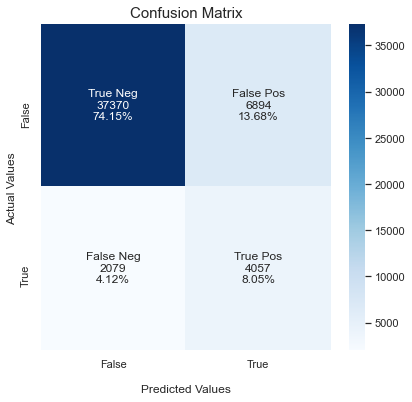

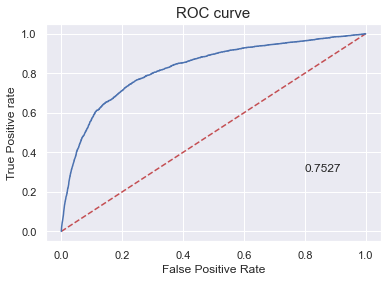

In [408]:
print(get_report(lgbm_base))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_lgbm_base)
print('Recall:',recall_lgbm_base)
print('Precision:',precision_lgbm_base)
print('f1_score:',f1_lgbm_base)
print('Accuracy:',accuracy_lgbm_base)
print('Bias error:',bias_lgbm_base)
print('Variance error:',var_lgbm_base)
confmatrix(lgbm_base)
get_roc_curve(lgbm_base)

<a id='adaboost'> </a>

### 9.7 AdaBoost Classifier Base Model

In [409]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada_base=ada.fit(X_train,y_train)

In [410]:
score_ada_base=cross_val_score(ada_base, X_train ,y_train , scoring='roc_auc')
bias_ada_base=np.mean(1-score_ada_base)
var_ada_base=np.std(score_ada_base)
ypred_ada_base = ada_base.predict(X_test)
accuracy_ada_base = accuracy_score(y_test, ypred_ada_base)
f1_ada_base= f1_score(y_test, ypred_ada_base)
precision_ada_base = precision_score(y_test, ypred_ada_base)
recall_ada_base = recall_score(y_test, ypred_ada_base)
auc_ada_base = roc_auc_score(y_test, ypred_ada_base)
conf_ada_base= confusion_matrix(y_test, ypred_ada_base)
cr_ada_base=classification_report(y_test,ypred_ada_base,output_dict=True)

In [471]:
report_list.append(['AdaBoost Base',cr_ada_base['0']['precision'],cr_ada_base['0']['recall'],cr_ada_base['0']['f1-score'],cr_ada_base['1']['precision'],cr_ada_base['1']['recall'],cr_ada_base['1']['f1-score'],cr_ada_base['accuracy'],score_ada_base.mean(),auc_ada_base,bias_ada_base,var_ada_base])

              precision    recall  f1-score   support

           0       0.90      0.58      0.70     44264
           1       0.14      0.52      0.23      6136

    accuracy                           0.57     50400
   macro avg       0.52      0.55      0.46     50400
weighted avg       0.80      0.57      0.64     50400


Auc: 0.5462374944360152
Recall: 0.5154823989569752
Precision: 0.14451500890939828
f1_score: 0.22574313956392966
Accuracy: 0.5695039682539682
Bias error: 0.3804310551622396
Variance error: 0.016872253360782276


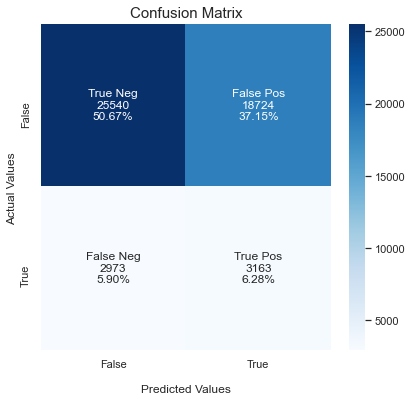

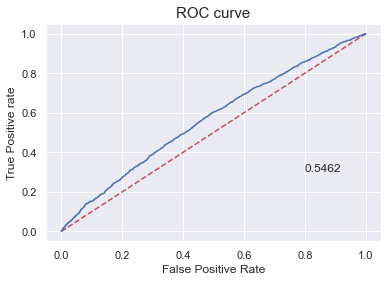

In [412]:
print(get_report(ada_base))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_ada_base)
print('Recall:',recall_ada_base)
print('Precision:',precision_ada_base)
print('f1_score:',f1_ada_base)
print('Accuracy:',accuracy_ada_base)
print('Bias error:',bias_ada_base)
print('Variance error:',var_ada_base)
confmatrix(ada_base)
get_roc_curve(ada_base)

<a id='gboost'> </a>

### 9.8 GradientBoostingClassifier Base Model

In [413]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc_base=gbc.fit(X_train,y_train)

In [414]:
score_gbc_base=cross_val_score(gbc_base, X_train ,y_train , scoring='roc_auc')
bias_gbc_base=np.mean(1-score_gbc_base)
var_gbc_base=np.std(score_gbc_base)
ypred_gbc_base = gbc_base.predict(X_test)
accuracy_gbc_base = accuracy_score(y_test, ypred_gbc_base)
f1_gbc_base= f1_score(y_test, ypred_gbc_base)
precision_gbc_base = precision_score(y_test, ypred_gbc_base)
recall_gbc_base = recall_score(y_test, ypred_gbc_base)
auc_gbc_base = roc_auc_score(y_test, ypred_gbc_base)
conf_gbc_base= confusion_matrix(y_test, ypred_gbc_base)
cr_gbc_base=classification_report(y_test,ypred_gbc_base,output_dict=True)

In [472]:
report_list.append(['GradientBoosting Base',cr_gbc_base['0']['precision'],cr_gbc_base['0']['recall'],cr_gbc_base['0']['f1-score'],cr_gbc_base['1']['precision'],cr_gbc_base['1']['recall'],cr_gbc_base['1']['f1-score'],cr_gbc_base['accuracy'],score_gbc_base.mean(),auc_gbc_base,bias_gbc_base,var_gbc_base])

              precision    recall  f1-score   support

           0       0.91      0.69      0.78     44264
           1       0.18      0.49      0.26      6136

    accuracy                           0.66     50400
   macro avg       0.54      0.59      0.52     50400
weighted avg       0.82      0.66      0.72     50400


Auc: 0.588734968993671
Recall: 0.4897327249022164
Precision: 0.17858204076781364
f1_score: 0.26172538431389625
Accuracy: 0.6636309523809524
Bias error: 0.2754630348535467
Variance error: 0.030401693593815435


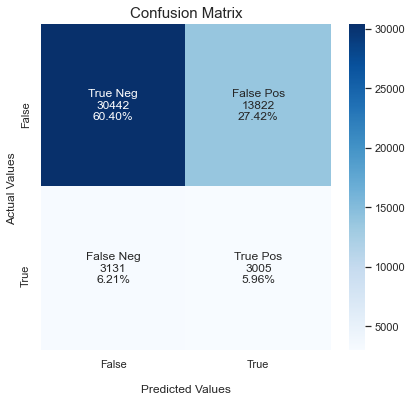

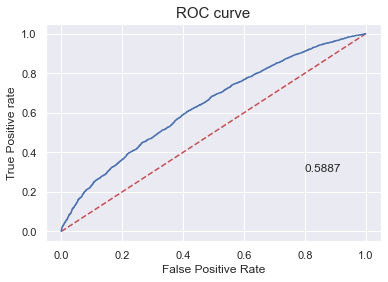

In [416]:
print(get_report(gbc_base))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_gbc_base)
print('Recall:',recall_gbc_base)
print('Precision:',precision_gbc_base)
print('f1_score:',f1_gbc_base)
print('Accuracy:',accuracy_gbc_base)
print('Bias error:',bias_gbc_base)
print('Variance error:',var_gbc_base)
confmatrix(gbc_base)
get_roc_curve(gbc_base)

<a id='xgboost'> </a>

### 9.9 XGBoostClassifier Base Model

In [417]:
xgb= XGBClassifier()
xgb_base=xgb.fit(X_train,y_train)

[17:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [418]:
score_xgb_base=cross_val_score(xgb_base, X_train ,y_train , scoring='roc_auc')
bias_xgb_base=np.mean(1-score_xgb_base)
var_xgb_base=np.std(score_xgb_base)
ypred_xgb_base = xgb_base.predict(X_test)
accuracy_xgb_base = accuracy_score(y_test, ypred_xgb_base)
f1_xgb_base= f1_score(y_test, ypred_xgb_base)
precision_xgb_base = precision_score(y_test, ypred_xgb_base)
recall_xgb_base = recall_score(y_test, ypred_xgb_base)
auc_xgb_base = roc_auc_score(y_test, ypred_xgb_base)
conf_xgb_base= confusion_matrix(y_test, ypred_xgb_base)
cr_xgb_base=classification_report(y_test,ypred_xgb_base,output_dict=True)

[17:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [473]:
report_list.append(['XGBoost Base',cr_xgb_base['0']['precision'],cr_xgb_base['0']['recall'],cr_xgb_base['0']['f1-score'],cr_xgb_base['1']['precision'],cr_xgb_base['1']['recall'],cr_xgb_base['1']['f1-score'],cr_xgb_base['accuracy'],score_xgb_base.mean(),auc_xgb_base,bias_xgb_base,var_xgb_base])

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     44264
           1       0.46      0.75      0.57      6136

    accuracy                           0.86     50400
   macro avg       0.71      0.82      0.75     50400
weighted avg       0.90      0.86      0.88     50400


Auc: 0.8150794327315706
Recall: 0.7517926988265972
Precision: 0.46143843152945885
f1_score: 0.5718713196553648
Accuracy: 0.8629563492063492
Bias error: 0.05394525310084244
Variance error: 0.027048166052215362


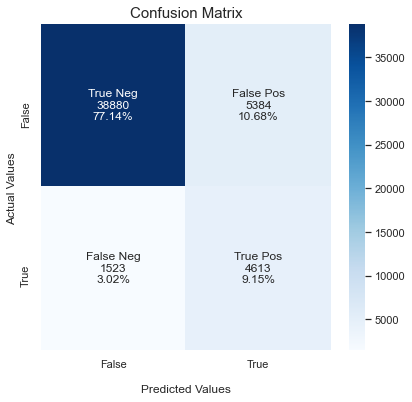

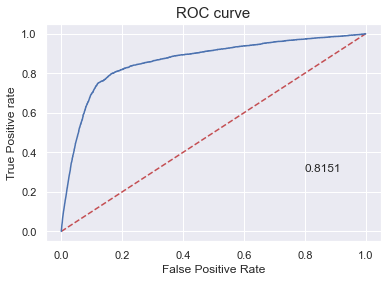

In [421]:
print(get_report(xgb_base))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_xgb_base)
print('Recall:',recall_xgb_base)
print('Precision:',precision_xgb_base)
print('f1_score:',f1_xgb_base)
print('Accuracy:',accuracy_xgb_base)
print('Bias error:',bias_xgb_base)
print('Variance error:',var_xgb_base)
confmatrix(xgb_base)
get_roc_curve(xgb_base)

<a id='rf_tuned'> </a>

### 9.10 Random Forest Model Hypertuned with GridSearchCV

In [425]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
  'n_estimators': [30, 50, 70, 90],
  'max_depth': [15, 20],
  'max_features': ['sqrt', 'log2'],
  'min_samples_split': [5, 8, 11],
  'min_samples_leaf': [1, 5, 9],
  'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification,
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest Classifier: ', rf_model.best_params_, '\n')

Best parameters for random forest Classifier:  {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} 



In [428]:
rf_tuned_model = RandomForestClassifier(criterion = rf_model.best_params_['criterion'], 
                                                   max_depth = rf_model.best_params_['max_depth'], 
                                                   max_features = rf_model.best_params_['max_features'],
                                                   max_leaf_nodes = rf_model.best_params_['max_leaf_nodes'],
                                                   min_samples_leaf = rf_model.best_params_['min_samples_leaf'],
                                                   min_samples_split = rf_model.best_params_['min_samples_split'], 
                                                   n_estimators = rf_model.best_params_['n_estimators'],
                                                   random_state = 10).fit(X_train, y_train)

In [429]:
score_rf_tuned_model=cross_val_score(rf_tuned_model, X_train ,y_train , scoring='roc_auc')
bias_rf_tuned_model=np.mean(1-score_rf_tuned_model)
var_rf_tuned_model=np.std(score_rf_tuned_model)
ypred_rf_tuned_model = rf_tuned_model.predict(X_test)
accuracy_rf_tuned_model = accuracy_score(y_test, ypred_rf_tuned_model)
f1_rf_tuned_model= f1_score(y_test, ypred_rf_tuned_model)
precision_rf_tuned_model = precision_score(y_test, ypred_rf_tuned_model)
recall_rf_tuned_model = recall_score(y_test, ypred_rf_tuned_model)
auc_rf_tuned_model = roc_auc_score(y_test, ypred_rf_tuned_model)
conf_rf_tuned_model= confusion_matrix(y_test, ypred_rf_tuned_model)
cr_rf_tuned_model=classification_report(y_test,ypred_rf_tuned_model,output_dict=True)

In [474]:
report_list.append(['Random Forest Tuned',cr_rf_tuned_model['0']['precision'],cr_rf_tuned_model['0']['recall'],cr_rf_tuned_model['0']['f1-score'],cr_rf_tuned_model['1']['precision'],cr_rf_tuned_model['1']['recall'],cr_rf_tuned_model['1']['f1-score'],cr_rf_tuned_model['accuracy'],score_rf_tuned_model.mean(),auc_rf_tuned_model,bias_rf_tuned_model,var_rf_tuned_model])

              precision    recall  f1-score   support

           0       0.90      0.56      0.69     44264
           1       0.15      0.55      0.23      6136

    accuracy                           0.56     50400
   macro avg       0.52      0.56      0.46     50400
weighted avg       0.81      0.56      0.64     50400


Auc: 0.5573627395282211
Recall: 0.5519882659713168
Precision: 0.14893149239292938
f1_score: 0.23457303137336383
Accuracy: 0.5614285714285714
Bias error: 0.3843965565084688
Variance error: 0.012013253292879814


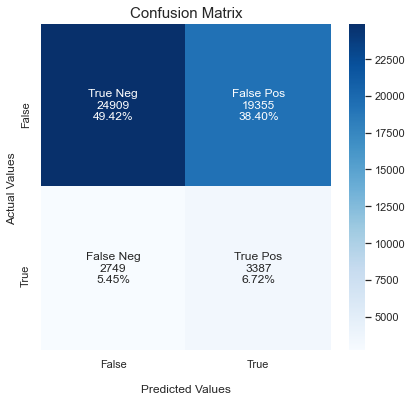

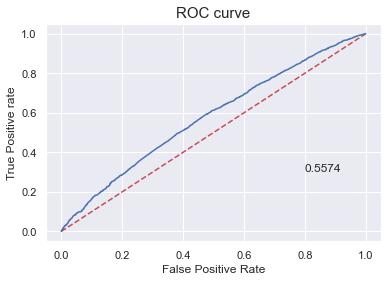

In [431]:
print(get_report(rf_tuned_model))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_rf_tuned_model)
print('Recall:',recall_rf_tuned_model)
print('Precision:',precision_rf_tuned_model)
print('f1_score:',f1_rf_tuned_model)
print('Accuracy:',accuracy_rf_tuned_model)
print('Bias error:',bias_rf_tuned_model)
print('Variance error:',var_rf_tuned_model)
confmatrix(rf_tuned_model)
get_roc_curve(rf_tuned_model)

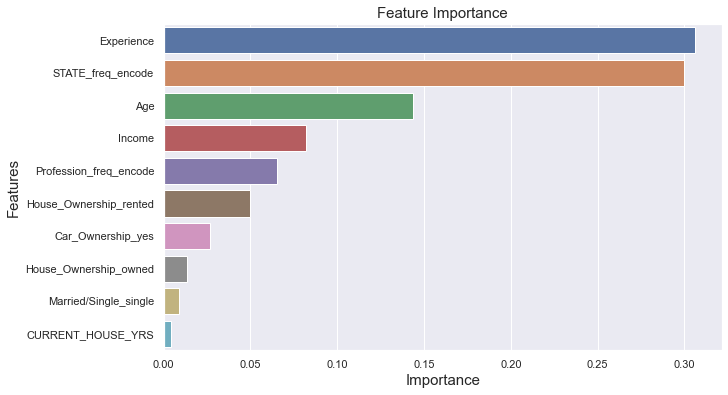

In [433]:
# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_tuned_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)
plt.figure(figsize=(10,6))

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

<a id='knn_tuned'> </a>

### 9.11 KNN Model Hypertuned with GridSearchCV

In [438]:
%%time

knn_grid_params = { 'n_neighbors' : list(np.arange(5,20)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn=KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn, 
                         param_grid = knn_grid_params, 
                         cv = 3,scoring='roc_auc')

knn_model=knn_grid.fit(X_train,y_train)

print('Best parameters for KNeighborsClassifier: ', knn_grid.best_params_, '\n')

Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'} 

Wall time: 1h 26min 43s


In [447]:
knn_tuned=KNeighborsClassifier(metric='manhattan',n_neighbors=18,weights='distance')
knn_tuned_model=knn_tuned.fit(X_train,y_train)

In [448]:
score_knn_tuned_model=cross_val_score(knn_tuned_model, X_train ,y_train , scoring='roc_auc')
bias_knn_tuned_model=np.mean(1-score_knn_tuned_model)
var_knn_tuned_model=np.std(score_knn_tuned_model)
ypred_knn_tuned_model = knn_tuned_model.predict(X_test)
accuracy_knn_tuned_model = accuracy_score(y_test, ypred_knn_tuned_model)
f1_knn_tuned_model= f1_score(y_test, ypred_knn_tuned_model)
precision_knn_tuned_model = precision_score(y_test, ypred_knn_tuned_model)
recall_knn_tuned_model = recall_score(y_test, ypred_knn_tuned_model)
auc_knn_tuned_model = roc_auc_score(y_test, ypred_knn_tuned_model)
conf_knn_tuned_model= confusion_matrix(y_test, ypred_knn_tuned_model)
cr_knn_tuned_model=classification_report(y_test,ypred_knn_tuned_model,output_dict=True)

In [475]:
report_list.append(['KNeighborsClassifier Tuned',cr_knn_tuned_model['0']['precision'],cr_knn_tuned_model['0']['recall'],cr_knn_tuned_model['0']['f1-score'],cr_knn_tuned_model['1']['precision'],cr_knn_tuned_model['1']['recall'],cr_knn_tuned_model['1']['f1-score'],cr_knn_tuned_model['accuracy'],score_knn_tuned_model.mean(),auc_knn_tuned_model,bias_knn_tuned_model,var_knn_tuned_model])

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     44264
           1       0.47      0.85      0.61      6136

    accuracy                           0.87     50400
   macro avg       0.72      0.86      0.76     50400
weighted avg       0.91      0.87      0.88     50400


Auc: 0.8584499580683495
Recall: 0.8497392438070405
Precision: 0.46998377501352084
f1_score: 0.6052234474753337
Accuracy: 0.8650396825396826
Bias error: 0.05165424550510056
Variance error: 0.0009393364541802567


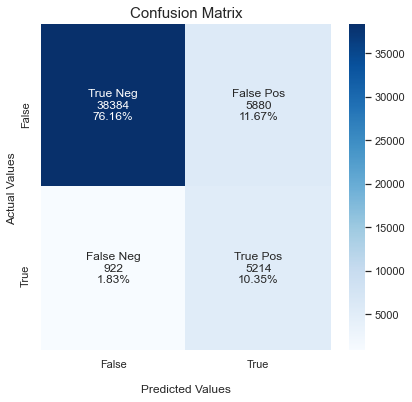

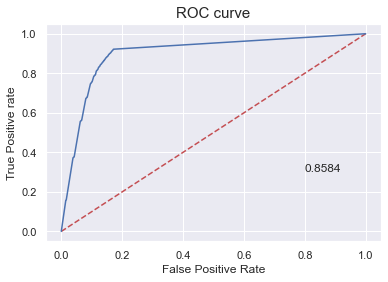

In [449]:
print(get_report(knn_tuned_model))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_knn_tuned_model)
print('Recall:',recall_knn_tuned_model)
print('Precision:',precision_knn_tuned_model)
print('f1_score:',f1_knn_tuned_model)
print('Accuracy:',accuracy_knn_tuned_model)
print('Bias error:',bias_knn_tuned_model)
print('Variance error:',var_knn_tuned_model)
confmatrix(knn_tuned_model)
get_roc_curve(knn_tuned_model)

<a id='dt_tuned'> </a>

### 9.12 Decision Tree Model Hypertuned with RandomizedSearchCV

In [452]:
dt_tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]



dt = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
dt_grid = RandomizedSearchCV(estimator = dt,
                       param_distributions= dt_tuned_paramaters, 
                       cv = 5,scoring='roc_auc')

# use fit() to fit the model on the train set
dt_tuned = dt_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest Classifier: ', dt_tuned.best_params_, '\n')

Best parameters for random forest Classifier:  {'min_samples_split': 2, 'min_samples_leaf': 6, 'max_leaf_nodes': 9, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'} 



In [453]:

dt_tuned_model=DecisionTreeClassifier(dt_tuned.best_params_['criterion'], 
                                                   max_depth = dt_tuned.best_params_['max_depth'], 
                                                   max_features = dt_tuned.best_params_['max_features'],
                                                   max_leaf_nodes = dt_tuned.best_params_['max_leaf_nodes'],
                                                   min_samples_leaf = dt_tuned.best_params_['min_samples_leaf'],
                                                   min_samples_split = dt_tuned.best_params_['min_samples_split'], 
                                                   
                                                   random_state = 10).fit(X_train, y_train)



In [454]:
score_dt_tuned_model=cross_val_score(dt_tuned_model, X_train ,y_train , scoring='roc_auc')
bias_dt_tuned_model=np.mean(1-score_dt_tuned_model)
var_dt_tuned_model=np.std(score_dt_tuned_model)
ypred_dt_tuned_model = dt_tuned_model.predict(X_test)
accuracy_dt_tuned_model = accuracy_score(y_test, ypred_dt_tuned_model)
f1_dt_tuned_model= f1_score(y_test, ypred_dt_tuned_model)
precision_dt_tuned_model = precision_score(y_test, ypred_dt_tuned_model)
recall_dt_tuned_model = recall_score(y_test, ypred_dt_tuned_model)
auc_dt_tuned_model = roc_auc_score(y_test, ypred_dt_tuned_model)
conf_dt_tuned_model= confusion_matrix(y_test, ypred_dt_tuned_model)
cr_dt_tuned_model=classification_report(y_test,ypred_dt_tuned_model,output_dict=True)

In [476]:
report_list.append(['Decision Tree Tuned',cr_dt_tuned_model['0']['precision'],cr_dt_tuned_model['0']['recall'],cr_dt_tuned_model['0']['f1-score'],cr_dt_tuned_model['1']['precision'],cr_dt_tuned_model['1']['recall'],cr_dt_tuned_model['1']['f1-score'],cr_dt_tuned_model['accuracy'],score_dt_tuned_model.mean(),auc_dt_tuned_model,bias_dt_tuned_model,var_dt_tuned_model])

              precision    recall  f1-score   support

           0       0.90      0.36      0.51     44264
           1       0.13      0.70      0.22      6136

    accuracy                           0.40     50400
   macro avg       0.51      0.53      0.37     50400
weighted avg       0.80      0.40      0.48     50400


Auc: 0.5306779095487524
Recall: 0.7011082138200783
Precision: 0.13188228080931944
f1_score: 0.22200433481267418
Accuracy: 0.40174603174603174
Bias error: 0.4414729749286388
Variance error: 0.005672484344870302


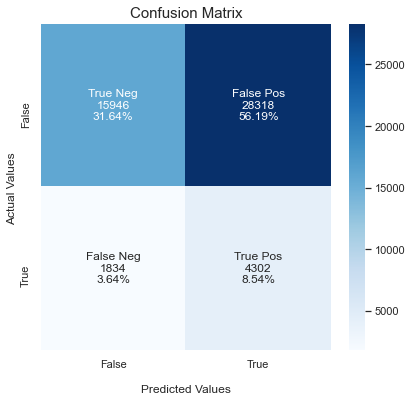

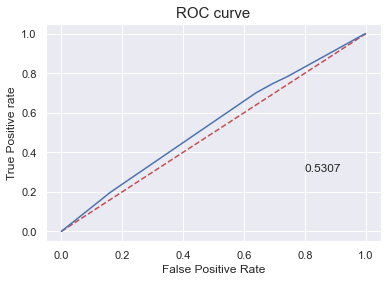

In [455]:
print(get_report(dt_tuned_model))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_dt_tuned_model)
print('Recall:',recall_dt_tuned_model)
print('Precision:',precision_dt_tuned_model)
print('f1_score:',f1_dt_tuned_model)
print('Accuracy:',accuracy_dt_tuned_model)
print('Bias error:',bias_dt_tuned_model)
print('Variance error:',var_dt_tuned_model)
confmatrix(dt_tuned_model)
get_roc_curve(dt_tuned_model)

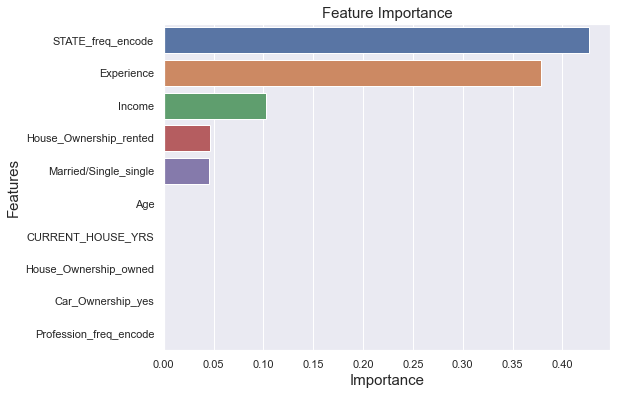

In [479]:
# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': dt_tuned_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(8,6))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

<a id='bagging'> </a>

### 9.13 Bagging Classifier With Random Forest as Base Estimator

In [456]:
from sklearn.ensemble import BaggingClassifier

In [457]:
est = RandomForestClassifier()
rf_bag = BaggingClassifier(base_estimator=est)
rf_bag_model=rf_bag.fit(X_train , y_train)


In [459]:
score_rf_bag_model=cross_val_score(rf_bag_model, X_train ,y_train , scoring='roc_auc')
bias_rf_bag_model=np.mean(1-score_rf_bag_model)
var_rf_bag_model=np.std(score_rf_bag_model)
ypred_rf_bag_model = rf_bag_model.predict(X_test)
accuracy_rf_bag_model = accuracy_score(y_test, ypred_rf_bag_model)
f1_rf_bag_model= f1_score(y_test, ypred_rf_bag_model)
precision_rf_bag_model = precision_score(y_test, ypred_rf_bag_model)
recall_rf_bag_model = recall_score(y_test, ypred_rf_bag_model)
auc_rf_bag_model = roc_auc_score(y_test, ypred_rf_bag_model)
conf_rf_bag_model= confusion_matrix(y_test, ypred_rf_bag_model)
cr_rf_bag_model=classification_report(y_test,ypred_rf_bag_model,output_dict=True)

In [480]:
report_list.append(['Baggin_RF',cr_rf_bag_model['0']['precision'],cr_rf_bag_model['0']['recall'],cr_rf_bag_model['0']['f1-score'],cr_rf_bag_model['1']['precision'],cr_rf_bag_model['1']['recall'],cr_rf_bag_model['1']['f1-score'],cr_rf_bag_model['accuracy'],score_rf_bag_model.mean(),auc_rf_bag_model,bias_rf_bag_model,var_rf_bag_model])

              precision    recall  f1-score   support

           0       0.97      0.90      0.94     44264
           1       0.53      0.79      0.64      6136

    accuracy                           0.89     50400
   macro avg       0.75      0.85      0.79     50400
weighted avg       0.92      0.89      0.90     50400


Auc: 0.8459538932106072
Recall: 0.7878096479791395
Precision: 0.532437493115982
f1_score: 0.6354255668747947
Accuracy: 0.8899404761904762
Bias error: 0.04060356074020308
Variance error: 0.003916505096463278


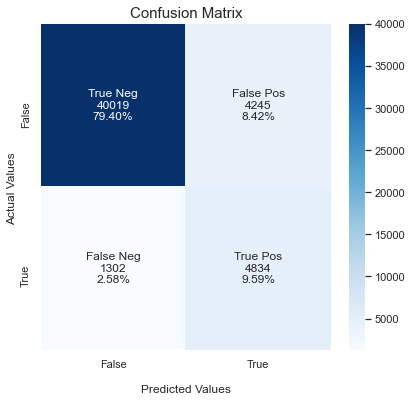

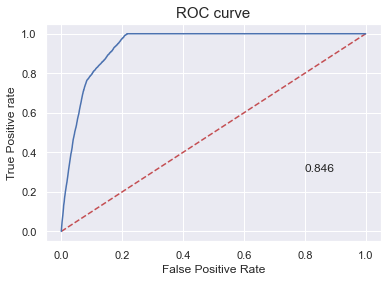

In [460]:
print(get_report(rf_bag_model))
plt.figure(figsize=(6.5,6))

print("")
print('Auc:',auc_rf_bag_model)
print('Recall:',recall_rf_bag_model)
print('Precision:',precision_rf_bag_model)
print('f1_score:',f1_rf_bag_model)
print('Accuracy:',accuracy_rf_bag_model)
print('Bias error:',bias_rf_bag_model)
print('Variance error:',var_rf_bag_model)
confmatrix(rf_bag_model)
get_roc_curve(rf_bag_model)

# <a id='kmeans'> </a>

## 10. K Means Clustering Approach

#### Trying to cluster the applicants using K Means Clustering to find any patterns.


In [483]:
from sklearn.cluster import KMeans   

In [484]:
df.head()

,Income,Age,Experience,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_freq_encode,STATE_freq_encode
0,-1.28,-1.58,-1.18,0.72,0,1,0,1,0,0.02,0.06
1,0.90,-0.58,-0.01,0.72,0,1,0,1,0,0.02,0.10
2,-0.35,0.94,-1.01,-1.43,0,0,0,1,0,0.02,0.02
3,0.44,-0.52,-1.35,0.00,1,1,0,1,1,0.02,0.02
4,0.27,-0.17,0.15,1.43,1,1,0,1,0,0.02,0.07


In [485]:
wcss = []

# pass the range to iterate the value of k
# last number in the range() is exclusive
for k in range(1,8):
    
    # fit K-means clustering with number of clusters K
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    # use 'inertia_' to get wcss 
    # append the value of WCSS for each K to the list 'wcss'
    wcss.append(kmeans.inertia_)

# print the within cluster sum of squares
print(wcss)

[1115229.9064804194, 925233.9291620259, 808468.3497677981, 715885.2859816395, 645775.2341462381, 596684.9364320764, 547499.1577454186]


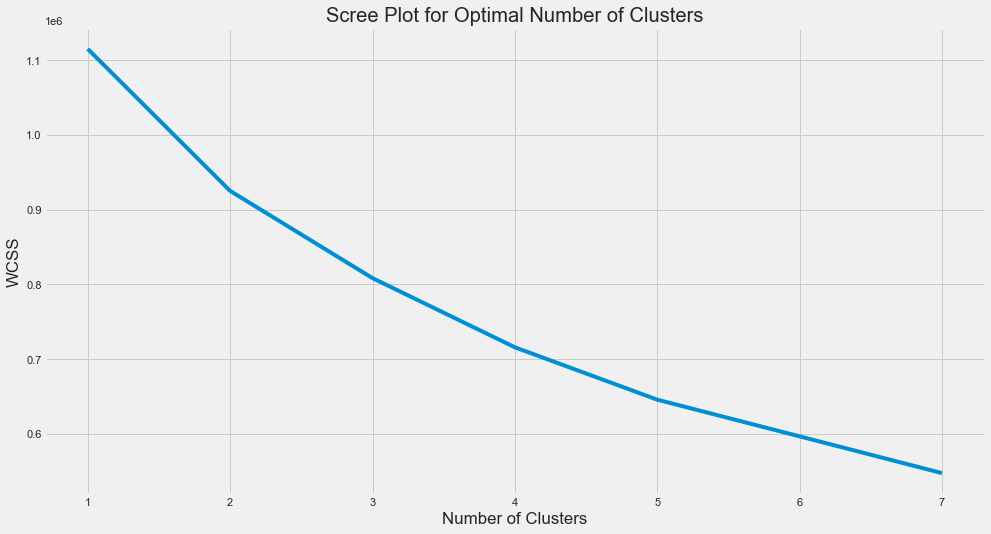

In [486]:
# visualize the elbow plot to get the optimal value of K

# set the plot style 
plt.style.use("fivethirtyeight")

# set the plot size using 'figsize'
plt.figure(figsize=(15,8))

# plot the elbow plot
# pass the values for K and WCSS
# last number in the range() is exclusive
plt.plot(range(1,8), wcss) 

# set the axes and plot labels
plt.xlabel("Number of Clusters")
plt.title('Scree Plot for Optimal Number of Clusters')
plt.ylabel("WCSS")

# display the plot
plt.show()

In [488]:
Kmeans3=KMeans(n_clusters = 2, random_state = 15, max_iter = 200, tol = 0.001)

# fit the model on the scaled data
Kmeans3.fit(X)

KMeans(max_iter=200, n_clusters=2, random_state=15, tol=0.001)

In [489]:
# store the lables in 'result'
result = Kmeans3.labels_

# create a dataframe of cluster labels
# pass the column name to the parameter 'cluster'
result = pd.DataFrame(result, columns = ["cluster"])

# group the data based on cluster labels and get size of each cluster
obs = result.groupby('cluster').size()

# print the cluster size
obs

cluster
0    127808
1    124192
dtype: int64

In [491]:
labels = Kmeans3.labels_

In [492]:
df_cluster=df.copy()

In [493]:
df_cluster['Cluster']=labels

In [494]:
df_cluster.head()

,Income,Age,Experience,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_freq_encode,STATE_freq_encode,Cluster
0,-1.28,-1.58,-1.18,0.72,0,1,0,1,0,0.02,0.06,1
1,0.90,-0.58,-0.01,0.72,0,1,0,1,0,0.02,0.10,1
2,-0.35,0.94,-1.01,-1.43,0,0,0,1,0,0.02,0.02,0
3,0.44,-0.52,-1.35,0.00,1,1,0,1,1,0.02,0.02,1
4,0.27,-0.17,0.15,1.43,1,1,0,1,0,0.02,0.07,1


In [495]:
df_cluster_0=df_cluster[df_cluster['Cluster']==0]
df_cluster_1=df_cluster[df_cluster['Cluster']==1]

In [496]:
df_cluster_0['Risk_Flag'].value_counts(normalize=True)

0   0.88
1   0.12
Name: Risk_Flag, dtype: float64

In [497]:
df_cluster_1['Risk_Flag'].value_counts(normalize=True)

0   0.88
1   0.12
Name: Risk_Flag, dtype: float64

In [498]:
df['Risk_Flag'].value_counts(normalize=True)

0   0.88
1   0.12
Name: Risk_Flag, dtype: float64

#### The formed clusters are not giving any strong inference as the proportion of the defaulters and non defaulters in both the clusters are similar to the original dataset.

# <a id='finalmodel'> </a>

## 11. Final Model Selection

In [511]:
report=pd.DataFrame(data=report_list,columns=['MODEL','Precision_0','Recall_0',
                                                        'f1-score_0','Precision_1','Recall_1','f1-score_1',
                                               'Overall_accuracy','ROC_AUC','cross_val_score','Bias_Error','Variance_Error'])
report.sort_values('ROC_AUC',ascending=False).reset_index(drop=True)


,MODEL,Precision_0,Recall_0,f1-score_0,Precision_1,Recall_1,f1-score_1,Overall_accuracy,ROC_AUC,cross_val_score,Bias_Error,Variance_Error
0,Random Forest Base,0.97,0.90,0.94,0.53,0.79,0.64,0.89,0.96,0.85,0.04,0.00
1,Baggin_RF,0.97,0.90,0.94,0.53,0.79,0.64,0.89,0.96,0.85,0.04,0.00
2,KNeighborsClassifier Tuned,0.98,0.87,0.92,0.47,0.85,0.61,0.87,0.95,0.86,0.05,0.00
3,XGBoost Base,0.96,0.88,0.92,0.46,0.75,0.57,0.86,0.95,0.82,0.05,0.03
4,KNN Base,0.98,0.86,0.92,0.46,0.85,0.60,0.86,0.94,0.85,0.06,0.00
5,Decision Tree Base,0.97,0.88,0.92,0.48,0.83,0.61,0.87,0.92,0.85,0.08,0.02
6,LGBMClassifier Base,0.95,0.84,0.89,0.37,0.66,0.47,0.82,0.91,0.75,0.09,0.03
7,GradientBoosting Base,0.91,0.69,0.78,0.18,0.49,0.26,0.66,0.72,0.59,0.28,0.03
8,AdaBoost Base,0.90,0.58,0.70,0.14,0.52,0.23,0.57,0.62,0.55,0.38,0.02
9,Random Forest Tuned,0.90,0.56,0.69,0.15,0.55,0.23,0.56,0.62,0.56,0.38,0.01


#### It can be observed from the table above that Random Forest Classifier and Bagging Classifier with Random Forest Classifier as as base estimator proved to be out best performing models considering ROC-AUC score to be the deciding metric. The accuracy is 89%, Area under ROC_AUC curve is 96%, the bias error and variance error are also very negligible, hence proving it to be a good model for our problem statement.

#### Considering Random Forest Classifier to be our final model, the most important feature is Income, followed by Age, Profession and then State to which the applicant belongs
.

<a id='summary'> </a>

## 12. Summary and Conclusion

In this notebook, we have studied various factors related to a financial loan, which governs the risk associated with the repayment in time.

We have analyzed the data, rectified few anomalies, made new columns for EDA, encoded categorical features, scaled the numerical features and also have observed 'class imbalance problem' related to the data. We even tried to use KMeans Clustering to see if any new pattern can be found but that did not help as well.

We have evaluated several classification models and have chosen `Random Forest Classifier` as our final model classifying the defaulting risk. We have chosen `ROC AUC` metric for measuring the performance of the models. Chosen model has scored around 0.96 which is a pretty good score. This means, our model will be correct on 96% times in identifying a borrower having risk of defaulting a loan. The overall accuracy is around 89% and the bias and variance errors are pretty negligible making our model a considerable model for prediction of a loan defaulter.

